**Early stage diabetes risk prediction dataset visualization using seaborn**

Used Seaborn beacuse it has simplified syntax and better default styles compared to Matplotlib. It also has built-in statistical visualizations, good integration with Pandas, and supports advanced visualizations like heat maps and cluster maps. Facet grids allow for easy visualization of multiple subsets of data. Seaborn is a powerful library for data visualization when used with Matplotlib and Scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df=pd.read_csv('diabetes_data_upload.csv')

In [3]:
df

Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
0               No              No     Yes           No             Yes   
1               No             Yes      No           No              No   
2               No              No     Yes           No             Yes   
3              Yes              No     Yes           No             Yes   
4               No             Yes     Yes          Yes             Yes   
..             ...             ...     ...          ...             ...   
515             No              No     Yes           No             Yes   
516             No              No     Yes          Yes             Yes   
517             No             Yes      No           No              No   
518             No             Yes     Yes           No             Yes   
519             No              No      No           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
0                No              Yes      Yes     Yes  Positive  
1               Yes               No      Yes      No  Positive  
2                No              Yes      Yes      No  Positive  
3                No               No       No      No  Positive  
4               Yes              Yes      Yes     Yes  Positive  
..              ...              ...      ...     ...       ...  
515             Yes               No       No      No  Positive  
516             Yes               No       No      No  Positive  
517             Yes              Yes       No     Yes  Positive  
518              No               No      Yes      No  Negative  
519              No               No       No      No  Negative  

[520 rows x 17 columns]

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df['Gender'] = df['Gender'].apply(str) #to conver 'gender' to string data type

In [6]:
df['class'].value_counts()
df['Gender'].value_counts()

#The value_counts() method returns a pandas Series object that lists the unique values in the specified column and the number of times each value appears in the column.

Male      328
Female    192
Name: Gender, dtype: int64

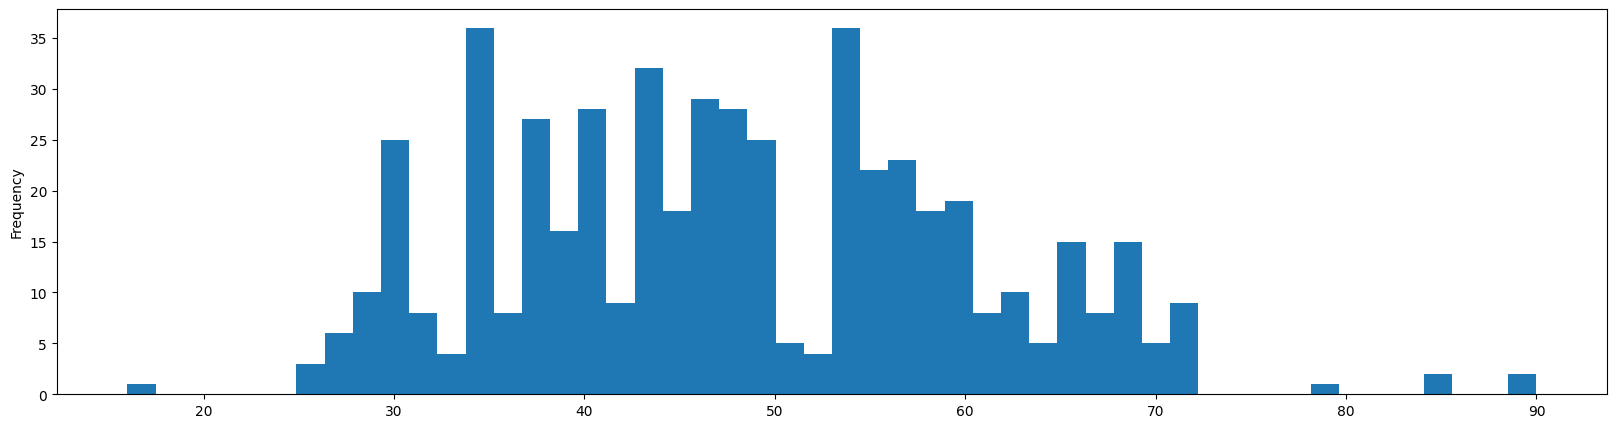

In [7]:
df['Age'].plot.hist(bins = 50, figsize = (20,5)) #to plot histogram
plt.show()

In [8]:
# This function takes a variable as input and creates a bar plot to visualize the frequency of its unique values in the 'df' DataFrame

def bar_plot(variable):
  v = df[variable]
  varV = v.value_counts()
  plt.figure(figsize=(2,2))
  plt.bar(varV.index, varV, color = 'orange', align = 'center', width = 0.2) 
#This line of code creates a bar plot with x-axis set to 'varV.index', y-axis set to 'varV', bar color set to 'orange', and bar alignment set to 'center' with a width of 0.2 using the matplotlib.pyplot.bar() method.
  plt.xticks(varV.index, varV.index.values)
  plt.ylabel('Frequency')
  plt.title(variable)
  plt.show()
  print("{}\n{}".format(variable, varV))


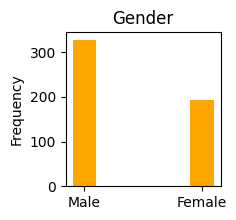

Gender
Male      328
Female    192
Name: Gender, dtype: int64


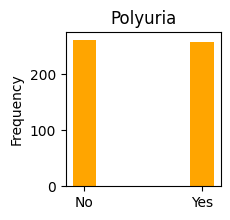

Polyuria
No     262
Yes    258
Name: Polyuria, dtype: int64


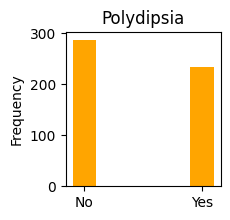

Polydipsia
No     287
Yes    233
Name: Polydipsia, dtype: int64


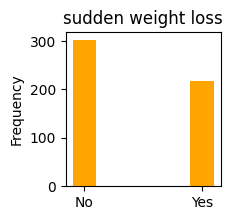

sudden weight loss
No     303
Yes    217
Name: sudden weight loss, dtype: int64


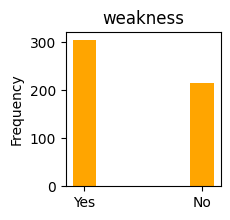

weakness
Yes    305
No     215
Name: weakness, dtype: int64


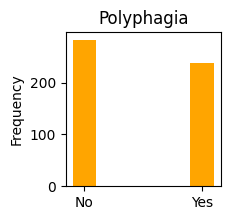

Polyphagia
No     283
Yes    237
Name: Polyphagia, dtype: int64


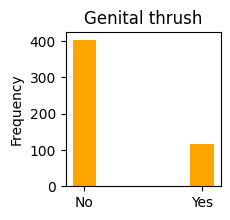

Genital thrush
No     404
Yes    116
Name: Genital thrush, dtype: int64


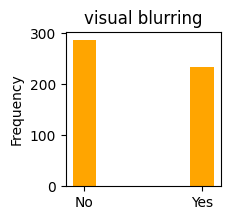

visual blurring
No     287
Yes    233
Name: visual blurring, dtype: int64


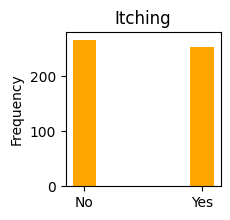

Itching
No     267
Yes    253
Name: Itching, dtype: int64


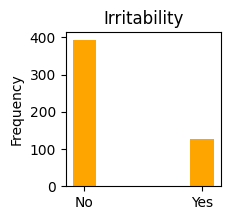

Irritability
No     394
Yes    126
Name: Irritability, dtype: int64


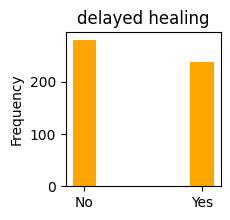

delayed healing
No     281
Yes    239
Name: delayed healing, dtype: int64


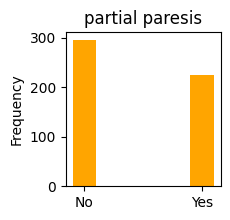

partial paresis
No     296
Yes    224
Name: partial paresis, dtype: int64


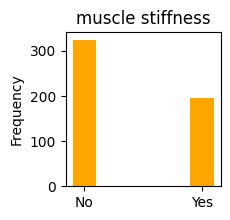

muscle stiffness
No     325
Yes    195
Name: muscle stiffness, dtype: int64


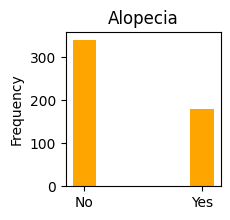

Alopecia
No     341
Yes    179
Name: Alopecia, dtype: int64


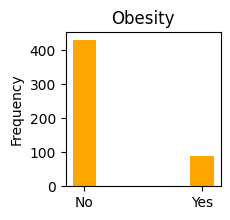

Obesity
No     432
Yes     88
Name: Obesity, dtype: int64


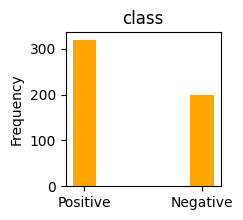

class
Positive    320
Negative    200
Name: class, dtype: int64


In [9]:
categorical =['Gender', 'Polyuria', 'Polydipsia','sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush','visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity','class']
for c in categorical:
  bar_plot(c)

In [10]:
# This function takes a numerical variable as input and creates a histogram to visualize the distribution of its values in the 'df' DataFrame, grouped by the 'class' column.
def plot_hist(variable):
  plt.figure(figsize=(9,3))
  sns.histplot(data=df, x = variable, hue="class", multiple="dodge", shrink=.8, palette=['black','yellow'])
    # Create a histogram using seaborn.histplot() method with data from 'df', x-axis set to the specified variable, hue set to 'class', 'multiple' set to 'dodge'/'stack', 'shrink' set to 0.8, and color palette set to ['black','yellow']
  plt.xlabel(variable)
  plt.ylabel('Frequency')
  plt.title('Histogram of {} vs class'.format(variable))
  plt.show()

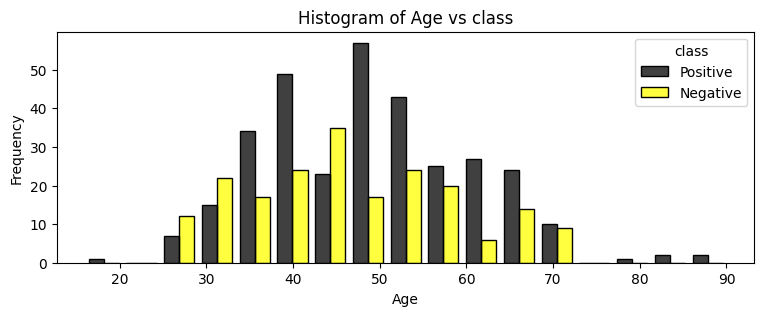

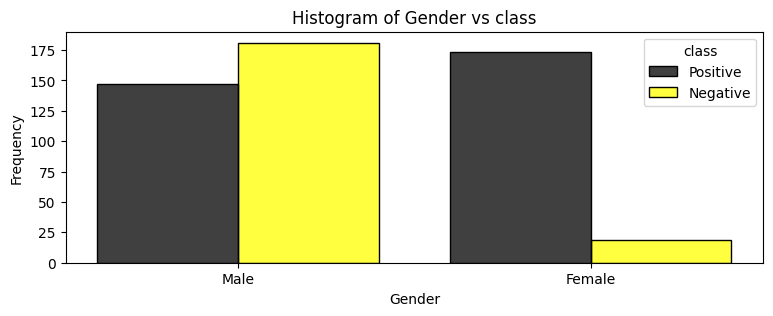

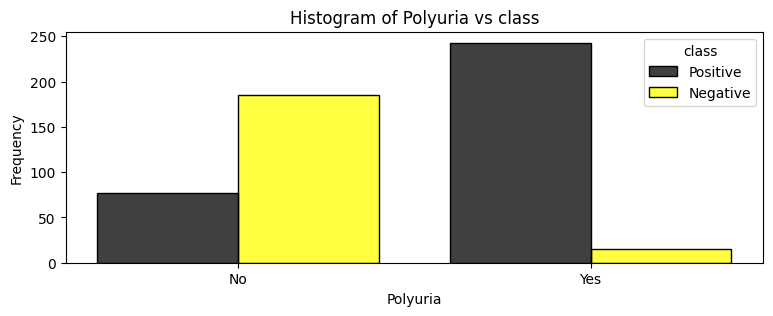

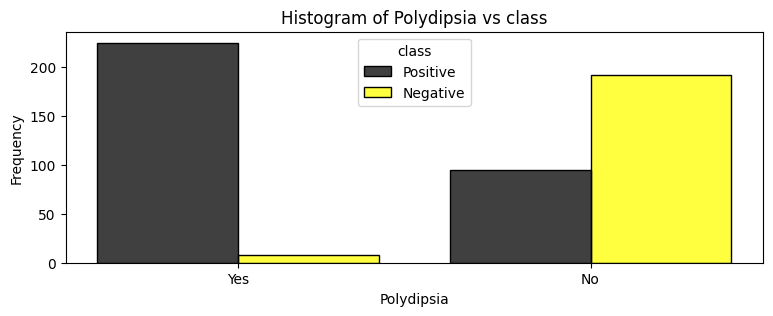

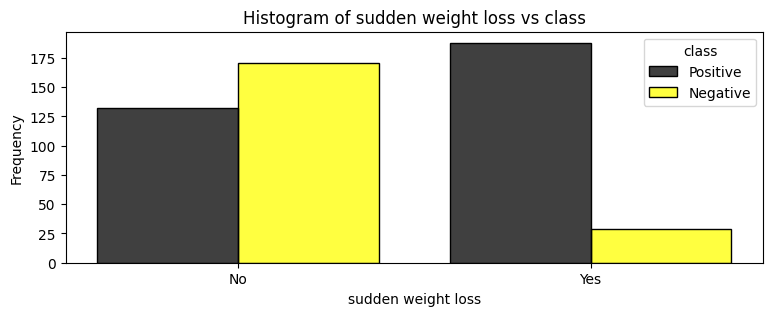

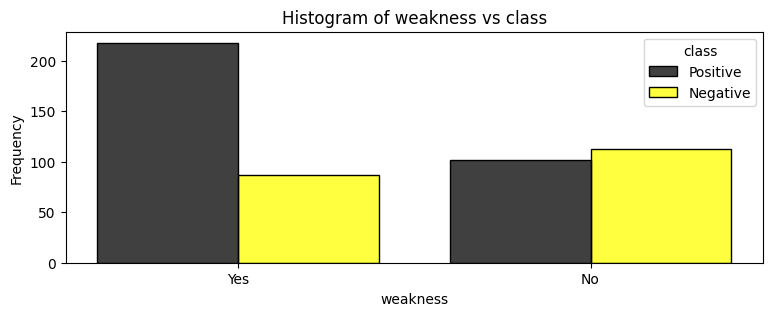

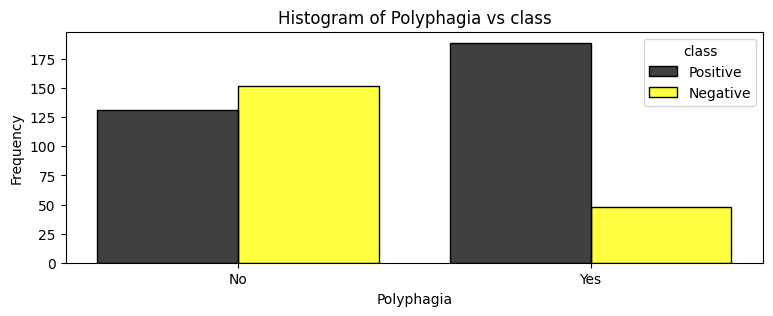

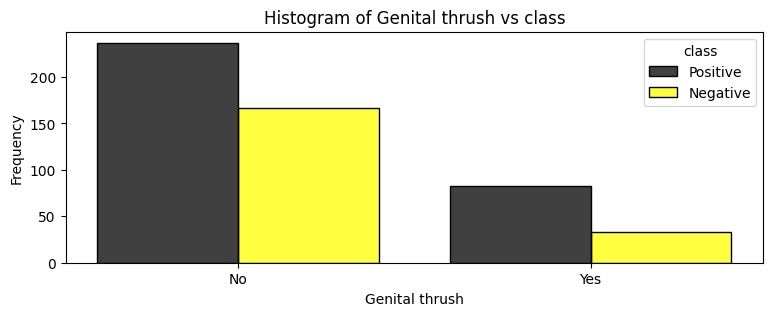

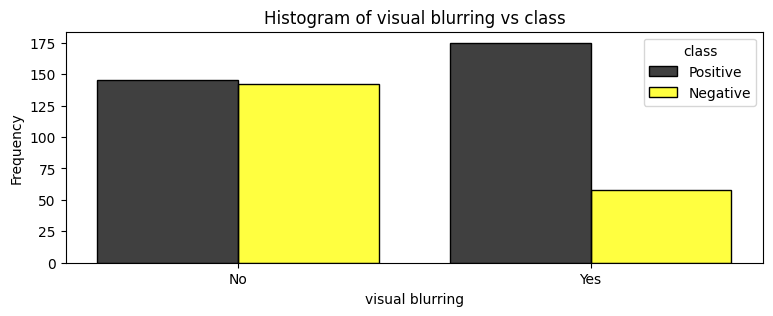

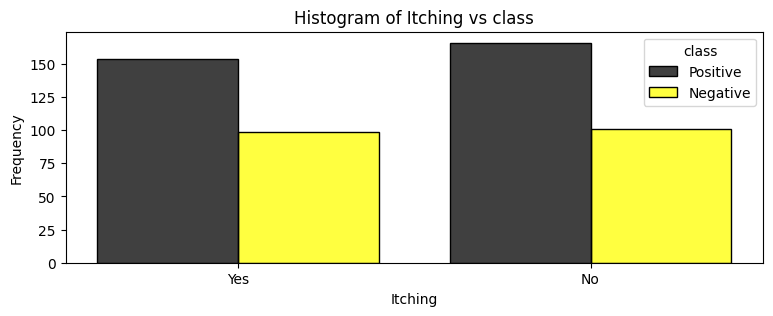

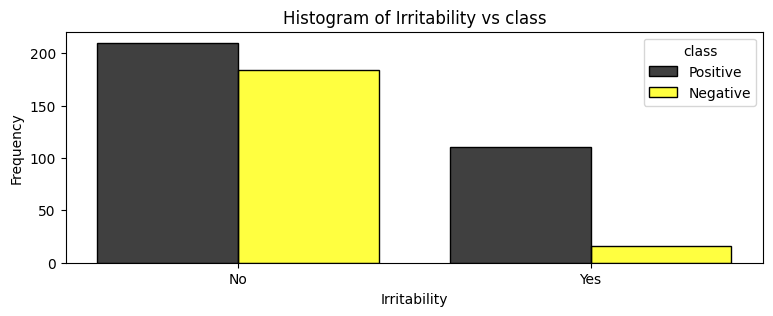

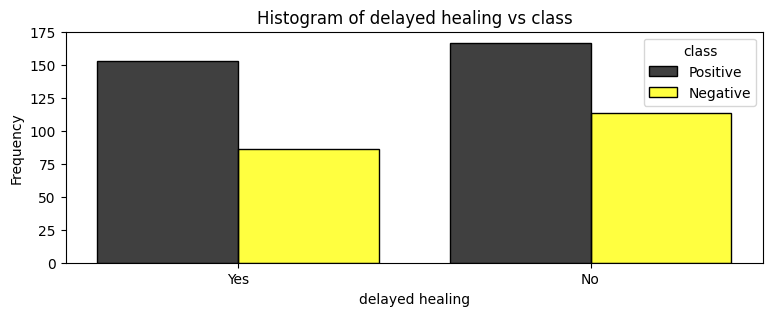

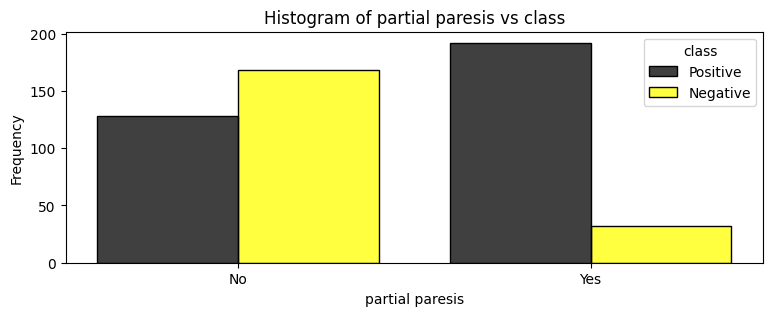

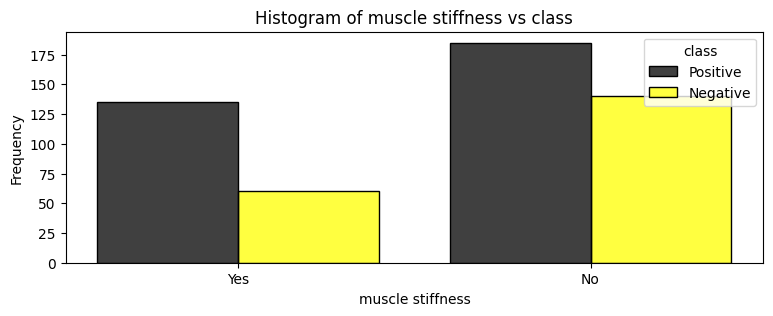

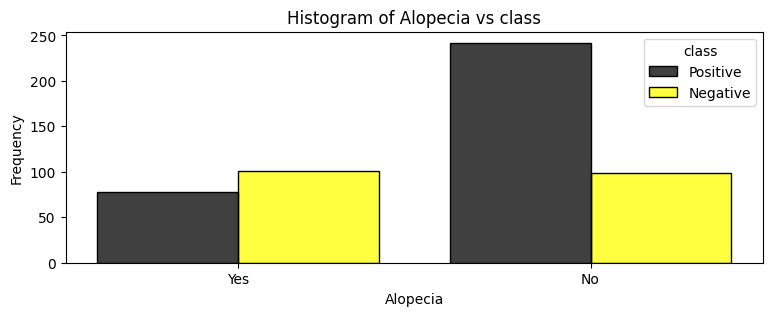

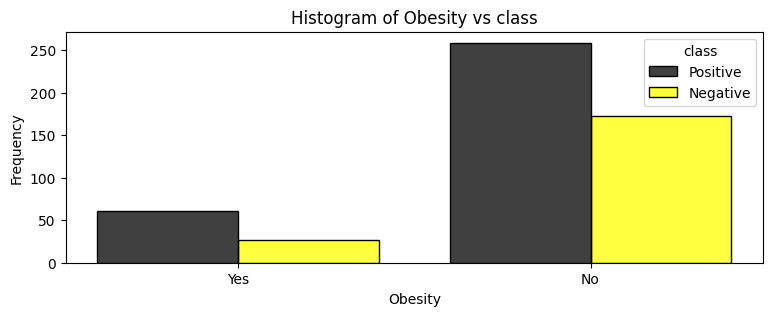

In [11]:
Var = ['Age','Gender', 'Polyuria', 'Polydipsia','sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush','visual blurring','Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
for n in Var:
  plot_hist(n)

<Axes: xlabel='Gender', ylabel='Age'>

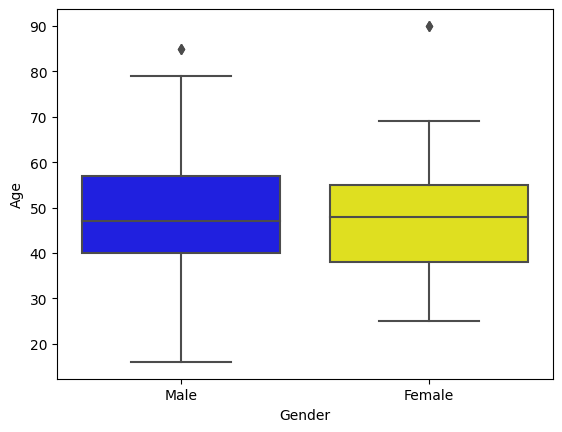

In [12]:
sns.boxplot(x="Gender", y='Age', data = df, palette=['blue','yellow']) #boxplot

In [13]:
# this sfunction used create a column 'Age_group' which is then used to plot hist for age distribution with respect to class

df1 = df.copy()

def age(i):
    for x in range(10,100,10):
        if i<x:
            m = f'{x-10}-{x}'
            return m
            break
df1['Age_group'] = df['Age'].apply(lambda x:age(x))
df1

Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
0               No              No     Yes           No             Yes   
1               No             Yes      No           No              No   
2               No              No     Yes           No             Yes   
3              Yes              No     Yes           No             Yes   
4               No             Yes     Yes          Yes             Yes   
..             ...             ...     ...          ...             ...   
515             No              No     Yes           No             Yes   
516             No              No     Yes          Yes             Yes   
517             No             Yes      No           No              No   
518             No             Yes     Yes           No             Yes   
519             No              No      No           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class Age_group  
0                No              Yes      Yes     Yes  Positive     40-50  
1               Yes               No      Yes      No  Positive     50-60  
2                No              Yes      Yes      No  Positive     40-50  
3                No               No       No      No  Positive     40-50  
4               Yes              Yes      Yes     Yes  Positive     60-70  
..              ...              ...      ...     ...       ...       ...  
515             Yes               No       No      No  Positive     30-40  
516             Yes               No       No      No  Positive     40-50  
517             Yes              Yes       No     Yes  Positive     50-60  
518              No               No      Yes      No  Negative     30-40  
519              No               No       No      No  Negative     40-50  

[520 rows x 18 columns]

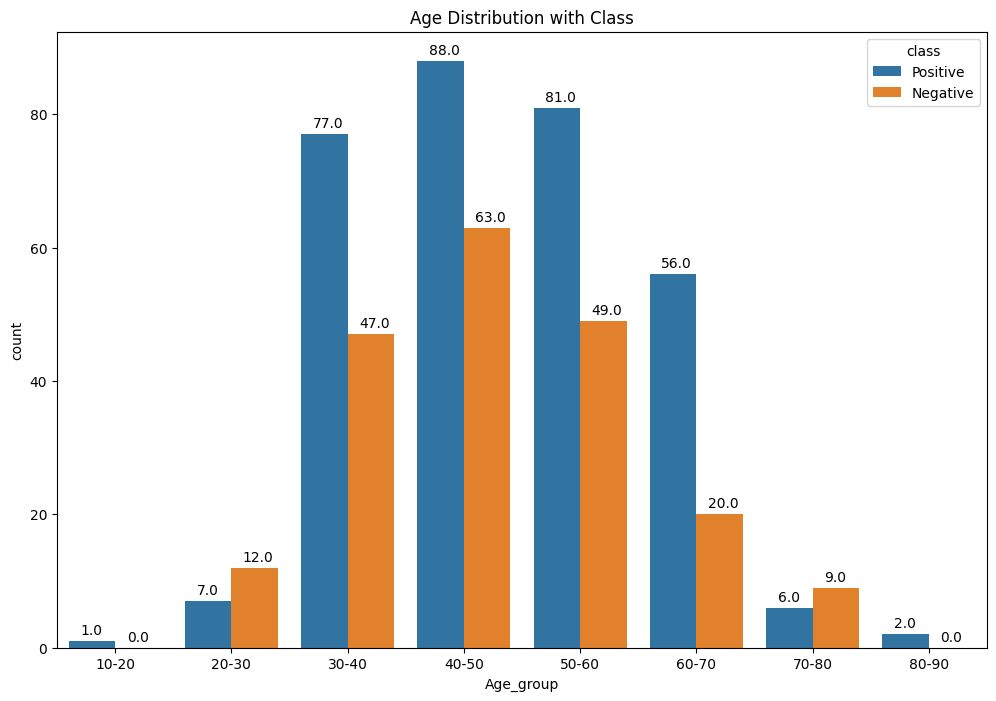

In [14]:
#This code creates a bar chart that shows the count of observations in each category of the 'Age_group' variable, separated by the 'class' variable. The 'order' parameter is used to specify the order of the categories on the x-axis, with the age group intervals listed in ascending order. The resulting plot is stored in the variable 'ax'.

plt.figure(figsize=(12,8)),
ax = sns.countplot(x = 'Age_group', data = df1, hue ='class', order=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+1))
    
plt.title("Age Distribution with Class")
plt.show()

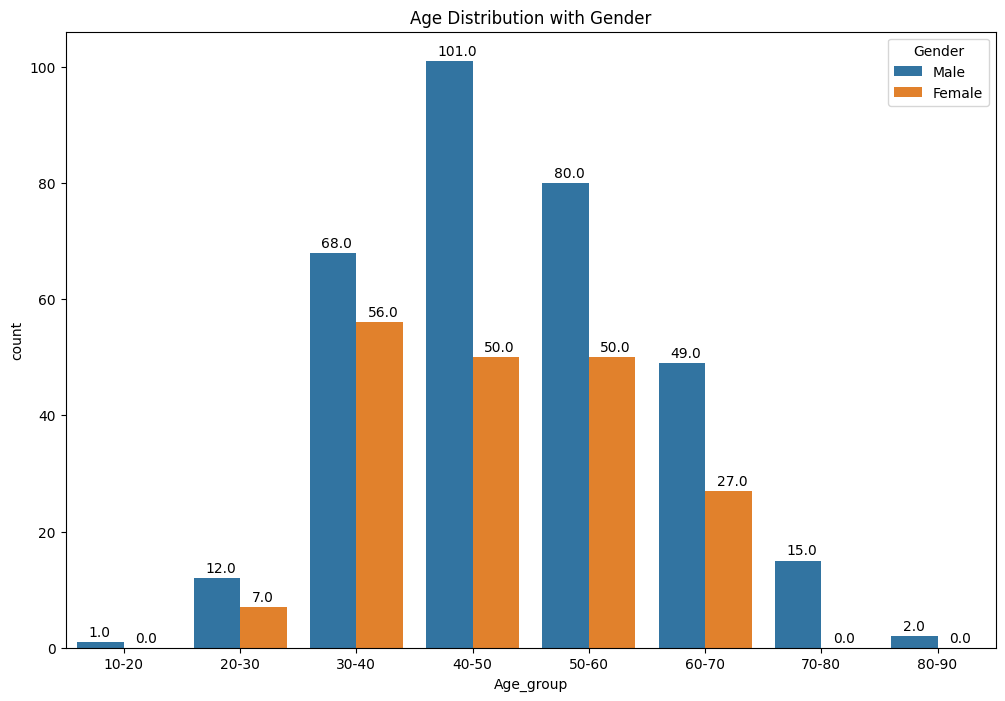

In [15]:
plt.figure(figsize=(12,8)),
ax = sns.countplot(x = 'Age_group', data = df1, hue ='Gender', order=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+1))
    
plt.title("Age Distribution with Gender")
plt.show()


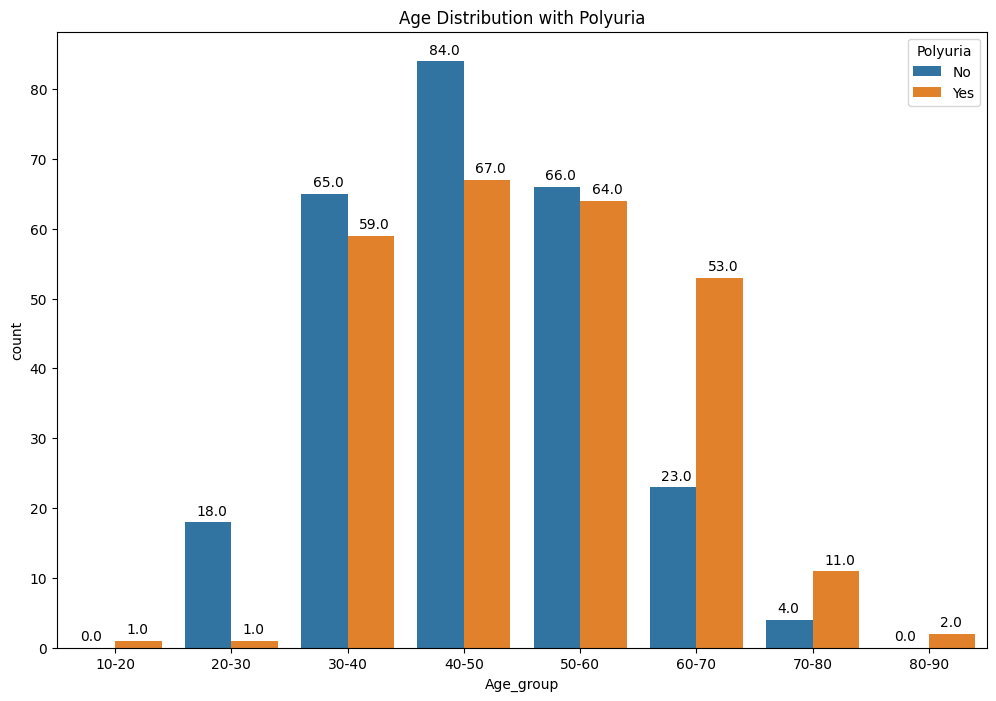

In [16]:
plt.figure(figsize=(12,8)),
ax = sns.countplot(x = 'Age_group', data = df1, hue ='Polyuria', order=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+1))
    
plt.title("Age Distribution with Polyuria")
plt.show()

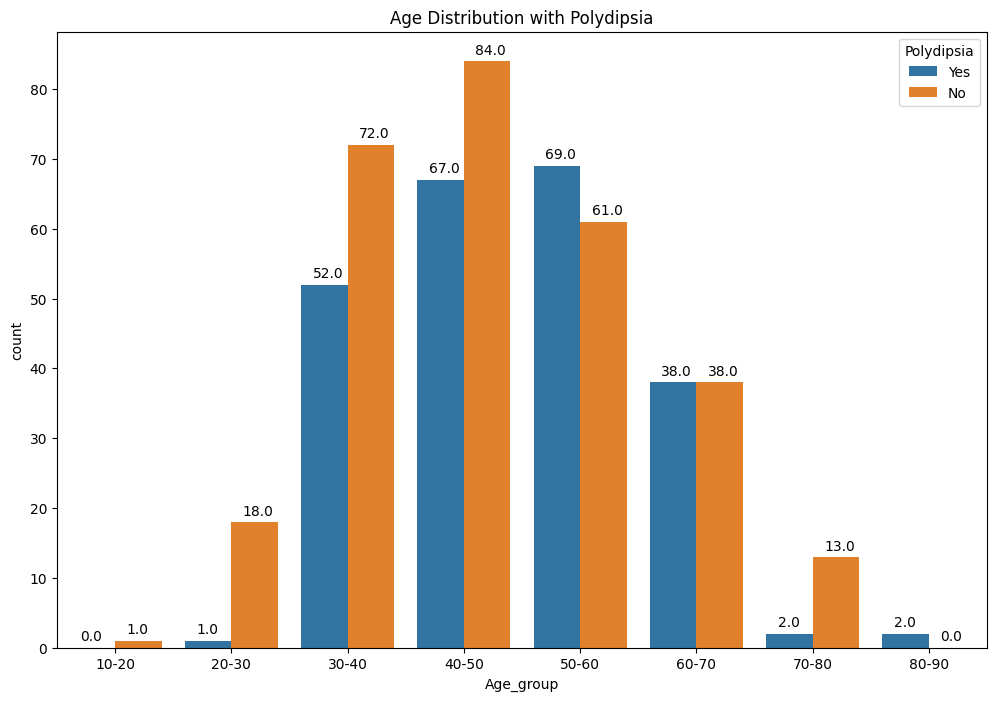

In [17]:
plt.figure(figsize=(12,8)),
ax = sns.countplot(x = 'Age_group', data = df1, hue ='Polydipsia', order=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+1))
    
plt.title("Age Distribution with Polydipsia")
plt.show()

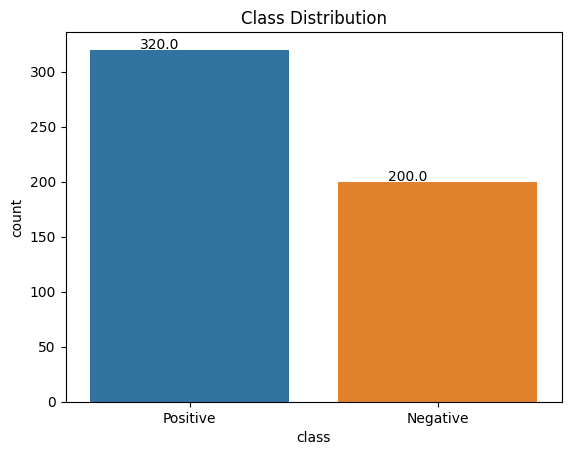

In [18]:
ax = sns.countplot(x=df["class"]) #displaying the status distribution of target feature
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.2, p.get_height()+.5))
plt.title("Class Distribution");

Plotted only with respect to polyuria and polydispia as their correlation higher compared to others

In [19]:
#used label encoder to convert variables to binary for plotting pairplot and correlation heatmap

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns[1:]:
  df[i] = le.fit_transform(df[i])

In [20]:
df

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1             0   
1             0               0                1        0             0   
2             1               0                0        1             0   
3             1               1                0        1             0   
4             1               0                1        1             1   
..          ...             ...              ...      ...           ...   
515           1               0                0        1             0   
516           1               0                0        1             1   
517           1               0                1        0             0   
518           0               0                1        1             0   
519           0               0                0        0             0   

     delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                  1                0                 1         1        1   
1                  0                1                 0         1        0   
2                  1                0                 1         1        0   
3                  1                0                 0         0        0   
4                  1                1                 1         1        1   
..               ...              ...               ...       ...      ...   
515                1                1                 0         0        0   
516                1                1                 0         0        0   
517                0                1                 1         0        1   
518                1                0                 0         1        0   
519                0                0                 0         0        0   

     class  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
515      1  
516      1  
517      1  
518      0  
519      0  

[520 rows x 17 columns]

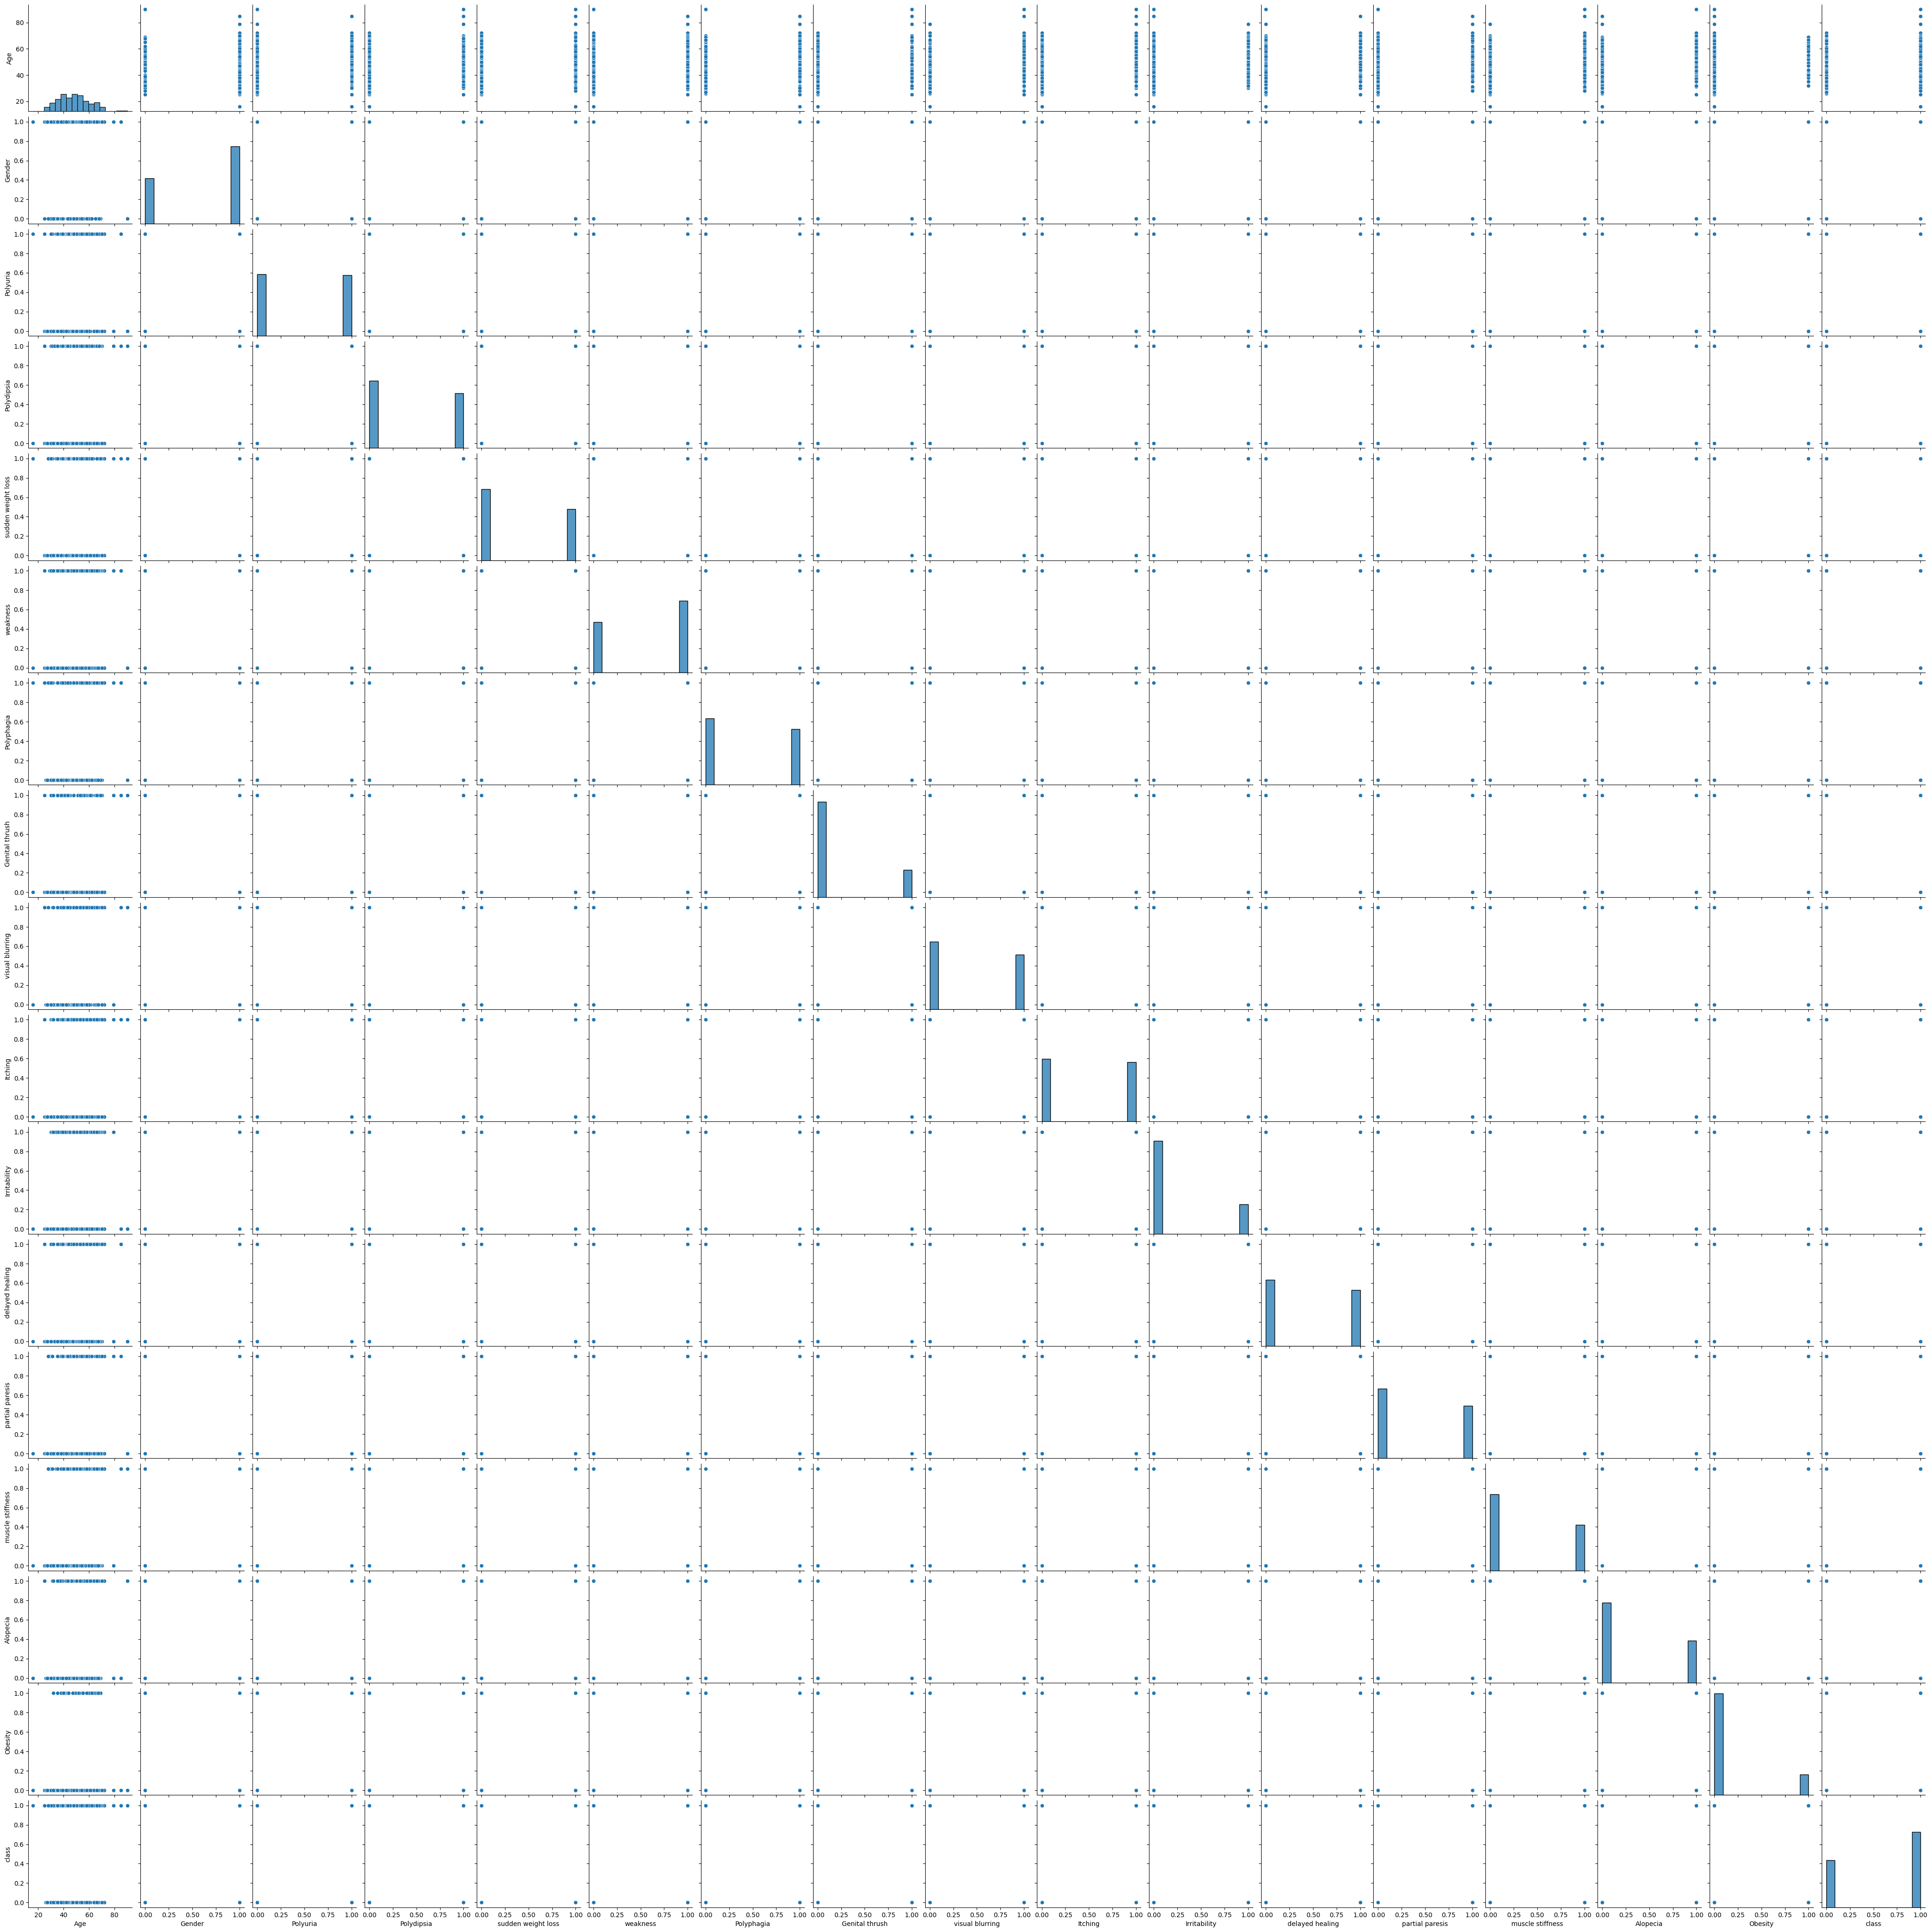

In [21]:
#This code creates a grid of scatterplots and histograms for each pair of numerical variables in the 'df' DataFrame. The resulting plot can help identify patterns and correlations between variables.
sns.pairplot(data=df)

<Axes: >

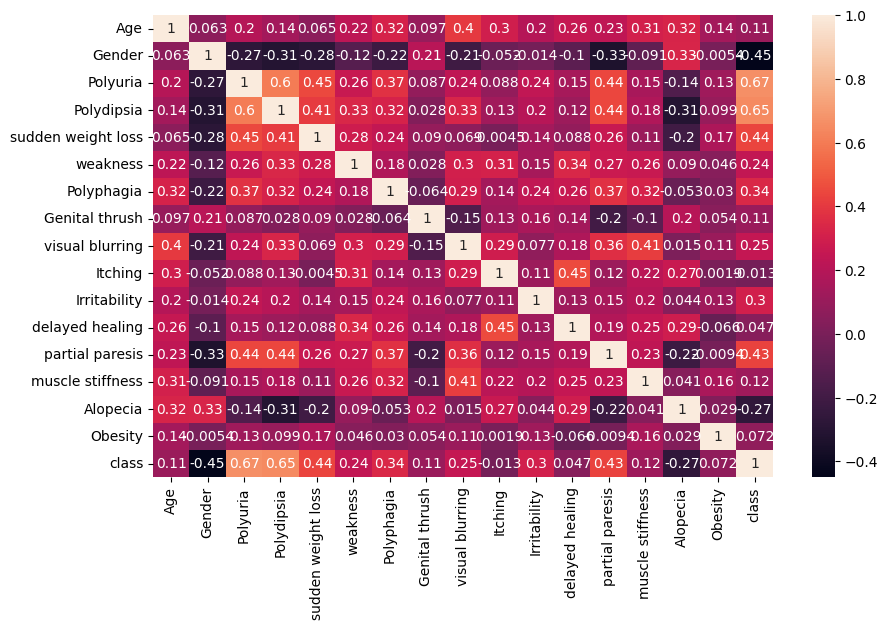

In [22]:
# plotted heatmap for correlation matrix
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [23]:
missing_values = df.isnull().sum()
print(missing_values)

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [24]:
import pandas as pd
columns_to_encode = ['Gender']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)


In [25]:
print(df_encoded.head())


   Age  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0   40         0           1                   0         1           0   
1   58         0           0                   0         1           0   
2   41         1           0                   0         1           1   
3   45         0           0                   1         1           1   
4   60         1           1                   1         1           1   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial paresis  muscle stiffness  Alopecia  Obesity  class  Gender_0  \
0         

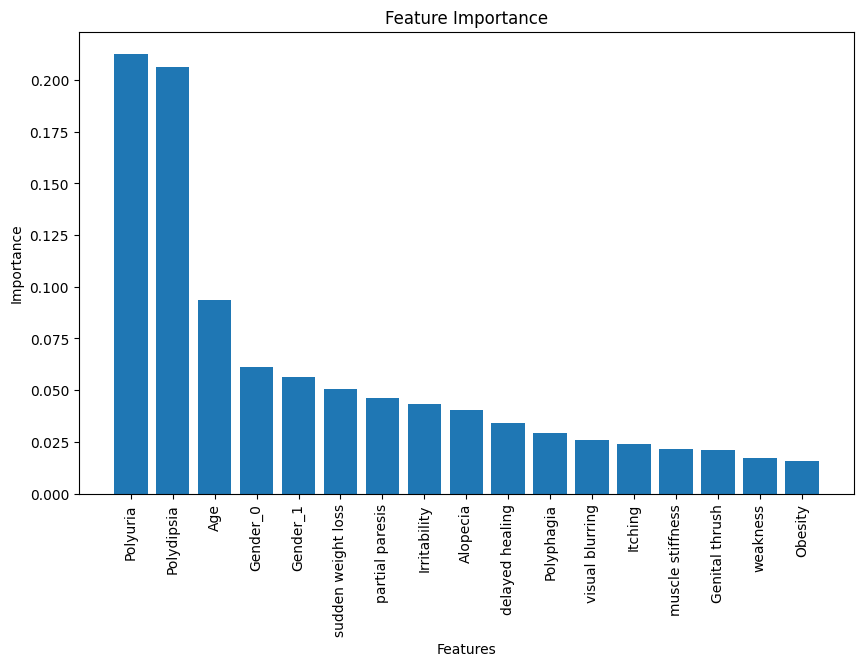

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(['class'], axis=1)
y = df_encoded['class']

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Get the feature names
feature_names = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances)
plt.xticks(range(len(importances)), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


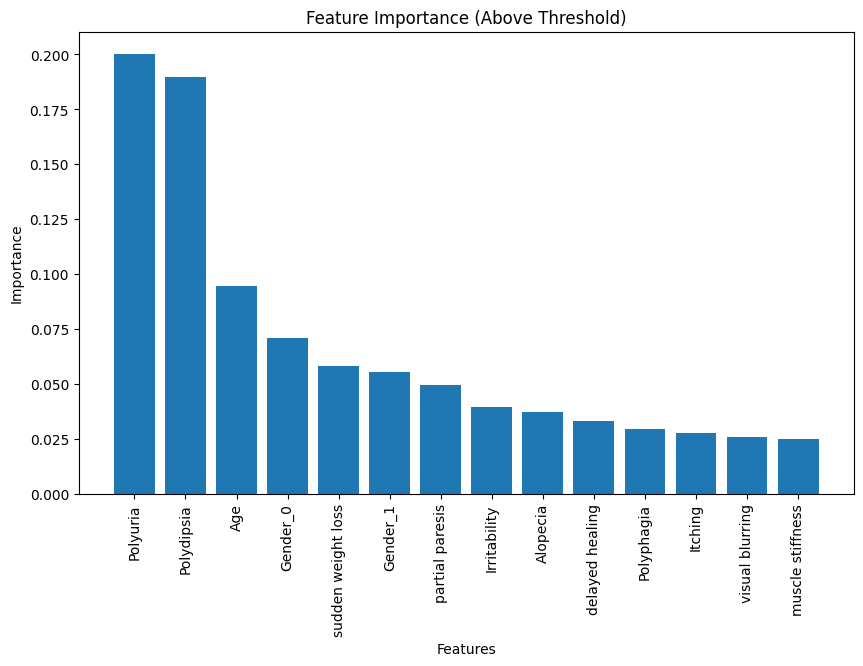

In [27]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(['class'], axis=1)
y = df_encoded['class']

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Get the feature names
feature_names = X.columns[sorted_indices]

# Set the threshold for feature selection
threshold = 0.025

# Get the indices of features with importance score above the threshold
selected_feature_indices = np.where(sorted_importances >= threshold)[0]

# Get the selected feature names
selected_feature_names = feature_names[selected_feature_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_indices)), sorted_importances[selected_feature_indices])
plt.xticks(range(len(selected_feature_indices)), selected_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Above Threshold)')
plt.show()


In [28]:
X_new=X[selected_feature_names]
X_new

Polyuria  Polydipsia  Age  Gender_0  sudden weight loss  Gender_1  \
0           0           1   40         0                   0         1   
1           0           0   58         0                   0         1   
2           1           0   41         0                   0         1   
3           0           0   45         0                   1         1   
4           1           1   60         0                   1         1   
..        ...         ...  ...       ...                 ...       ...   
515         1           1   39         1                   1         0   
516         1           1   48         1                   1         0   
517         1           1   58         1                   1         0   
518         0           0   32         1                   0         0   
519         0           0   42         0                   0         1   

     partial paresis  Irritability  Alopecia  delayed healing  Polyphagia  \
0                  0             0         1                1           0   
1                  1             0         1                0           0   
2                  0             0         1                1           1   
3                  0             0         0                1           1   
4                  1             1         1                1           1   
..               ...           ...       ...              ...         ...   
515                1             0         0                1           1   
516                1             1         0                1           1   
517                1             0         0                0           1   
518                0             0         1                1           0   
519                0             0         0                0           0   

     Itching  visual blurring  muscle stiffness  
0          1                0                 1  
1          0                1                 0  
2          1                0                 1  
3          1                0                 0  
4          1                1                 1  
..       ...              ...               ...  
515        1                0                 0  
516        1                0                 0  
517        0                1                 1  
518        1                1                 0  
519        0                0                 0  

[520 rows x 14 columns]

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf, X, y, scoring=scoring, cv=5)

# Get the mean scores across cross-validation folds
mean_accuracy = cv_results['test_accuracy'].mean()
mean_precision = cv_results['test_precision'].mean()
mean_recall = cv_results['test_recall'].mean()
mean_f1 = cv_results['test_f1'].mean()

# Print the performance metrics
print('Accuracy:', mean_accuracy)
print('Precision:', mean_precision)
print('Recall:', mean_recall)
print('F1-score:', mean_f1)


Accuracy: 0.976923076923077
Precision: 0.9761990950226245
Recall: 0.9875
F1-score: 0.9816528219384839


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)
logreg = LogisticRegression(max_iter=1000)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9134615384615384
Precision: 0.9305555555555556
Recall: 0.9436619718309859
F1-score: 0.9370629370629372


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model with regularization
logistic_regression = LogisticRegression(penalty='l2', max_iter=1000)

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9134615384615384
Precision: 0.9305555555555556
Recall: 0.9436619718309859
F1-score: 0.9370629370629372


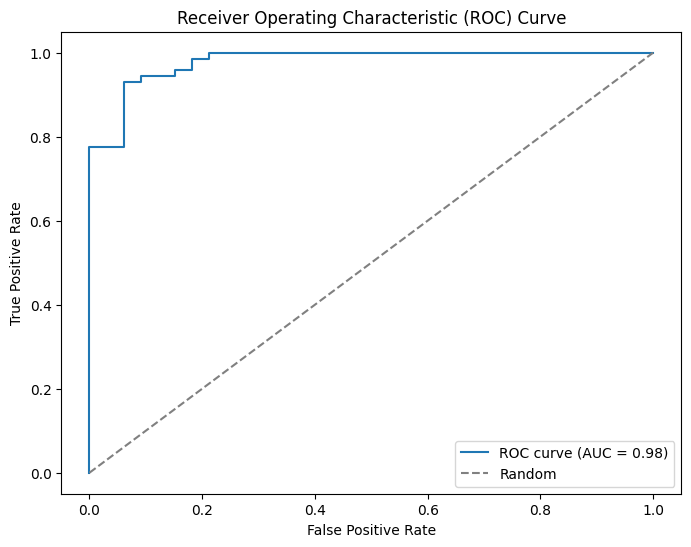

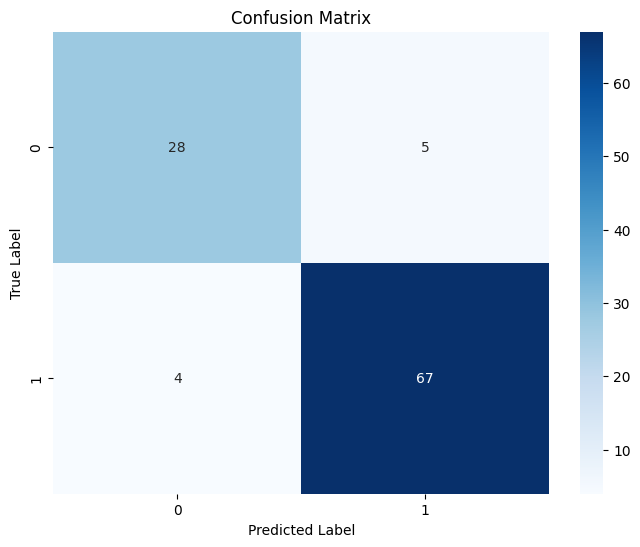

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Get the predicted probabilities for positive class
y_pred_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Training Set Size: 41
Training Accuracy: nan ± nan
Validation Accuracy: nan ± nan

Training Set Size: 83
Training Accuracy: nan ± nan
Validation Accuracy: nan ± nan

Training Set Size: 124
Training Accuracy: nan ± nan
Validation Accuracy: nan ± nan

Training Set Size: 166
Training Accuracy: nan ± nan
Validation Accuracy: nan ± nan

Training Set Size: 208
Training Accuracy: 0.951923076923077 ± 0.010084700463174551
Validation Accuracy: 0.8038461538461539 ± 0.11370573460841907

Training Set Size: 249
Training Accuracy: 0.9269076305220884 ± 0.01974008952199919
Validation Accuracy: 0.8826923076923077 ± 0.03566776344421425

Training Set Size: 291
Training Accuracy: 0.9182130584192439 ± 0.0203185505142192
Validation Accuracy: 0.9 ± 0.039691860462596734

Training Set Size: 332
Training Accuracy: 0.9138554216867469 ± 0.022101128105836303
Validation Accuracy: 0.9076923076923077 ± 0.024777112936009836

Training Set Size: 374
Training Accuracy: 0.9165775401069519 ± 0.01685976766891385
Validation A

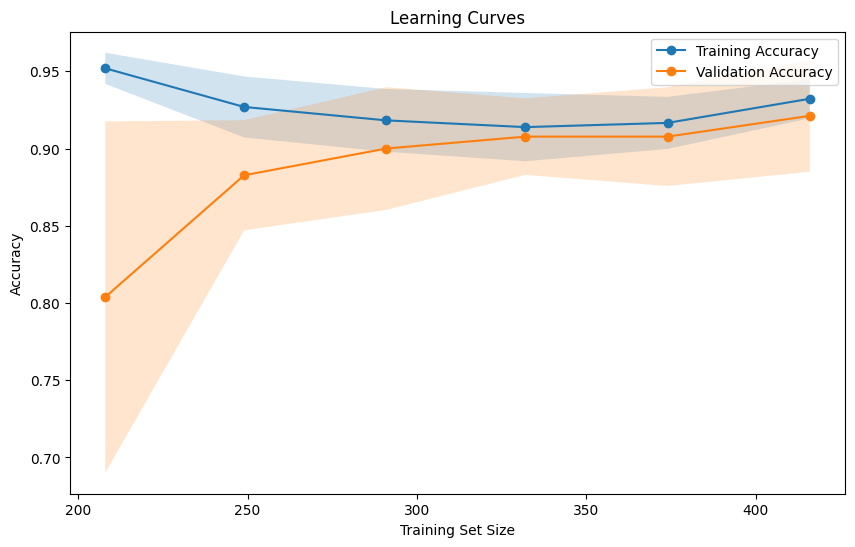

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the Logistic Regression model
logistic_regression = LogisticRegression(penalty='l2', max_iter=1000)

# Compute the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    logistic_regression, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print the learning curves results
for i, train_size in enumerate(train_sizes):
    print(f'Training Set Size: {train_size}')
    print(f'Training Accuracy: {train_scores_mean[i]} ± {train_scores_std[i]}')
    print(f'Validation Accuracy: {val_scores_mean[i]} ± {val_scores_std[i]}\n')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8557692307692307
Precision: 0.9666666666666667
Recall: 0.8169014084507042
F1-score: 0.8854961832061069


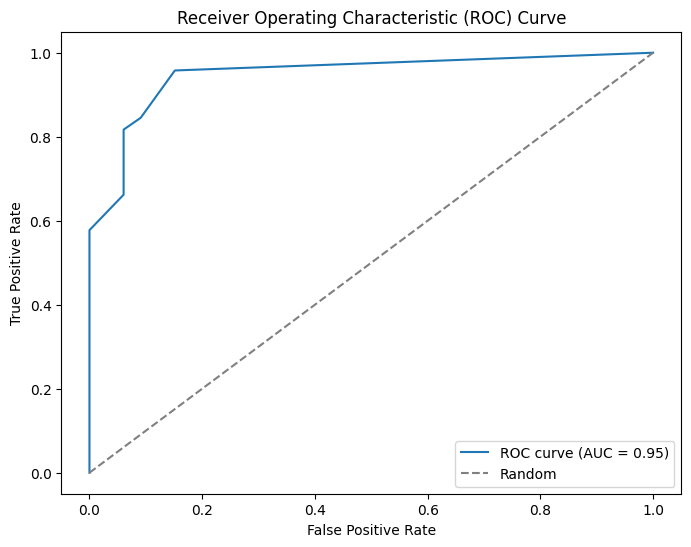

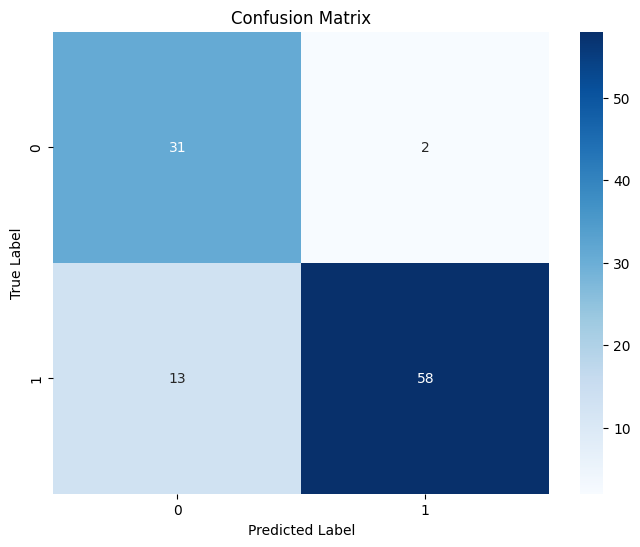

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Get the predicted probabilities for positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Training Set Size: 41
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 83
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 124
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 166
Training Accuracy: 0.9301204819277109 ± 0.06714638454502542
Validation Accuracy: 0.6557692307692309 ± 0.05652668637191947

Training Set Size: 208
Training Accuracy: 0.9028846153846155 ± 0.039924114407743655
Validation Accuracy: 0.7019230769230769 ± 0.07348066605593385

Training Set Size: 249
Training Accuracy: 0.8883534136546185 ± 0.015943319872513427
Validation Accuracy: 0.8346153846153846 ± 0.03566776344421424

Training Set Size: 291
Training Accuracy: 0.8996563573883162 ± 0.008247422680412394
Validation Accuracy: 0.8423076923076923 ± 0.05593476758557301

Training Set Size: 332
Training Accuracy: 0.9012048192771085 ± 0.006973395724572445
Validation Accuracy: 0.85384615384

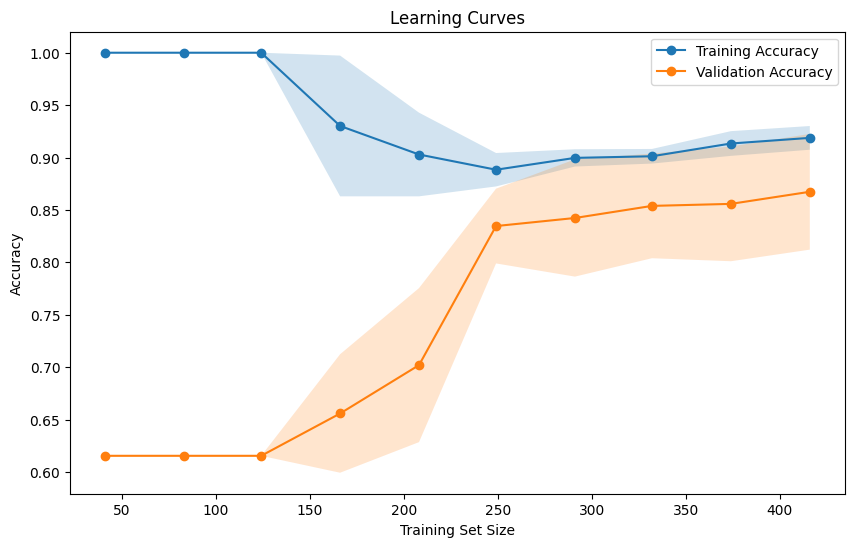

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Compute the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    knn, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print the learning curves results
for i, train_size in enumerate(train_sizes):
    print(f'Training Set Size: {train_size}')
    print(f'Training Accuracy: {train_scores_mean[i]} ± {train_scores_std[i]}')
    print(f'Validation Accuracy: {val_scores_mean[i]} ± {val_scores_std[i]}\n')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9326923076923077
Precision: 0.9571428571428572
Recall: 0.9436619718309859
F1-score: 0.9503546099290779


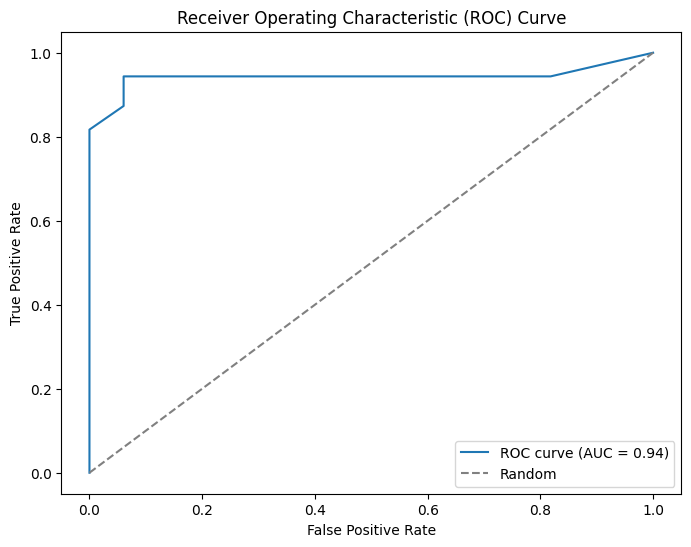

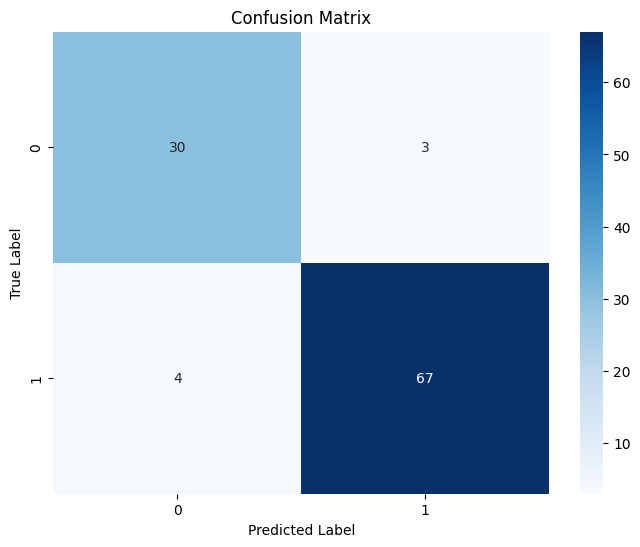

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Get the predicted probabilities for positive class
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Training Set Size: 41
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 83
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 124
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 166
Training Accuracy: 0.9855421686746988 ± 0.014050486493603128
Validation Accuracy: 0.7826923076923077 ± 0.14178698916282123

Training Set Size: 208
Training Accuracy: 0.9721153846153845 ± 0.01193237850576043
Validation Accuracy: 0.8615384615384615 ± 0.07512317301778697

Training Set Size: 249
Training Accuracy: 0.9622489959839357 ± 0.010348673676084446
Validation Accuracy: 0.9038461538461539 ± 0.0338592631954981

Training Set Size: 291
Training Accuracy: 0.9642611683848796 ± 0.01055827594208743
Validation Accuracy: 0.9211538461538462 ± 0.02386475701152088

Training Set Size: 332
Training Accuracy: 0.9602409638554217 ± 0.009215095506492993
Validation Accuracy: 0.925 ± 0.01413

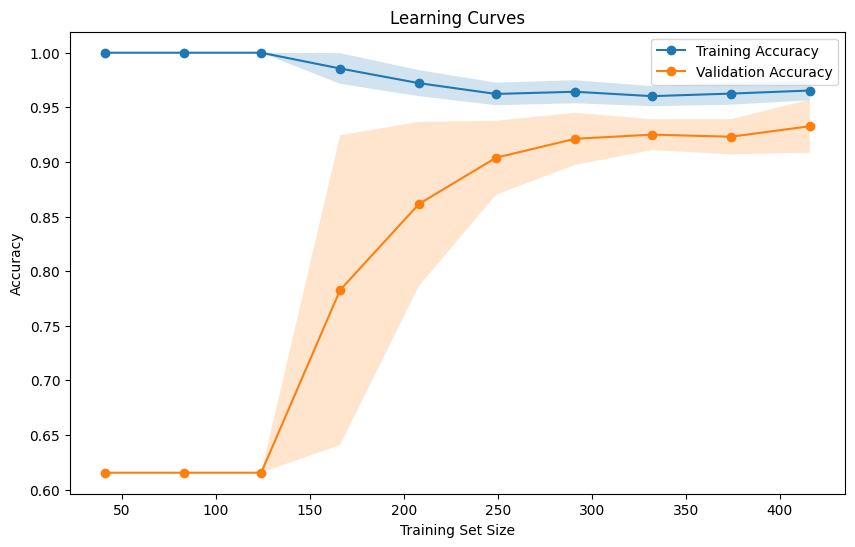

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Compute the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    decision_tree, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print the learning curves results
for i, train_size in enumerate(train_sizes):
    print(f'Training Set Size: {train_size}')
    print(f'Training Accuracy: {train_scores_mean[i]} ± {train_scores_std[i]}')
    print(f'Validation Accuracy: {val_scores_mean[i]} ± {val_scores_std[i]}\n')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = X_new
y = df_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9903846153846154
Precision: 1.0
Recall: 0.9859154929577465
F1-score: 0.9929078014184397


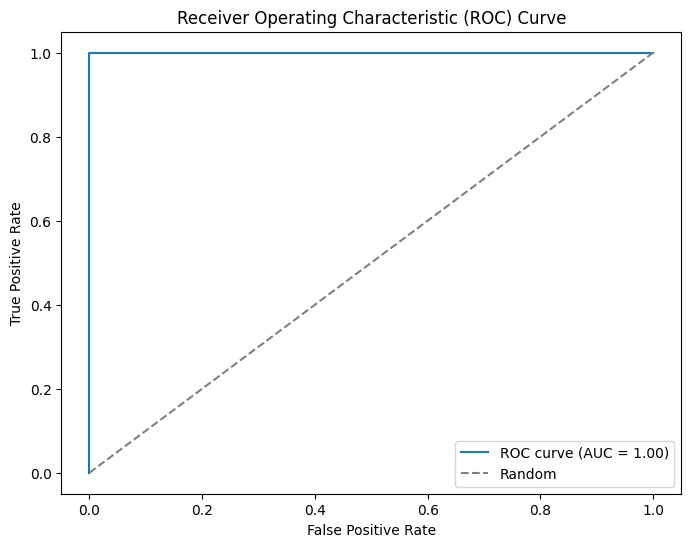

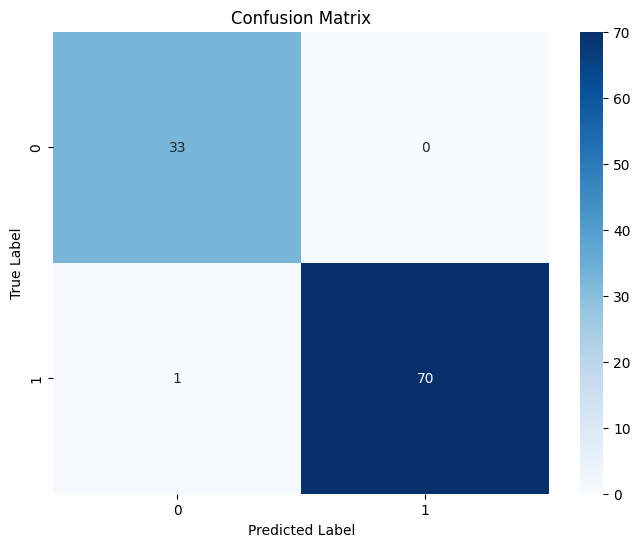

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Get the predicted probabilities for positive class
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model on the training set
y_train_pred = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)

# Evaluate the model on the test set
y_test_pred = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Test Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)


Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Test Set Metrics:
Accuracy: 0.9903846153846154
Precision: 1.0
Recall: 0.9859154929577465
F1-score: 0.9929078014184397


Training Set Size: 41
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 83
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 124
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.6153846153846154 ± 0.0

Training Set Size: 166
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.7788461538461539 ± 0.14595127662315596

Training Set Size: 208
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.8653846153846153 ± 0.09843449147745945

Training Set Size: 249
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.9384615384615385 ± 0.0465527632188854

Training Set Size: 291
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.9673076923076923 ± 0.027601346335398697

Training Set Size: 332
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.975 ± 0.02826334318595973

Training Set Size: 374
Training Accuracy: 1.0 ± 0.0
Validation Accuracy: 0.976923076923077 ± 0.028910185343024804

Training Set Size: 416
Train

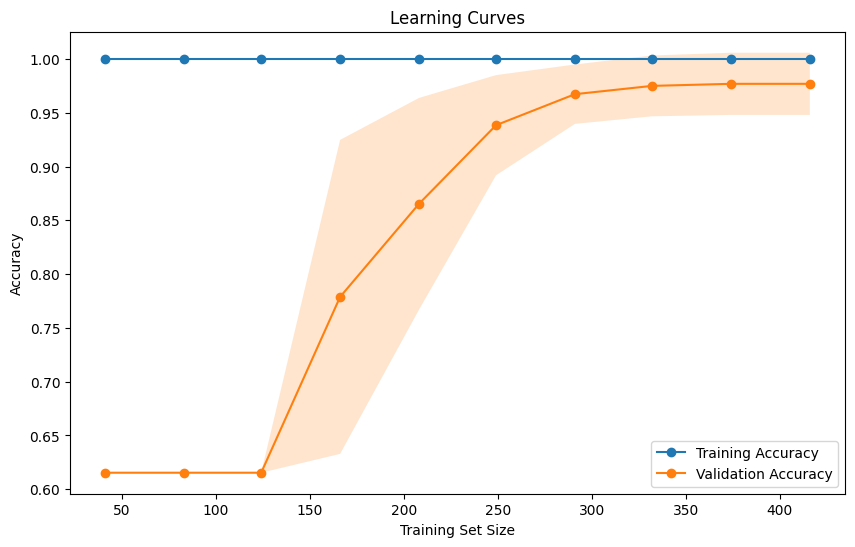

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the Random Forest classifier
random_forest = RandomForestClassifier()

# Compute the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    random_forest, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
for i, train_size in enumerate(train_sizes):
    print(f'Training Set Size: {train_size}')
    print(f'Training Accuracy: {train_scores_mean[i]} ± {train_scores_std[i]}')
    print(f'Validation Accuracy: {val_scores_mean[i]} ± {val_scores_std[i]}\n')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


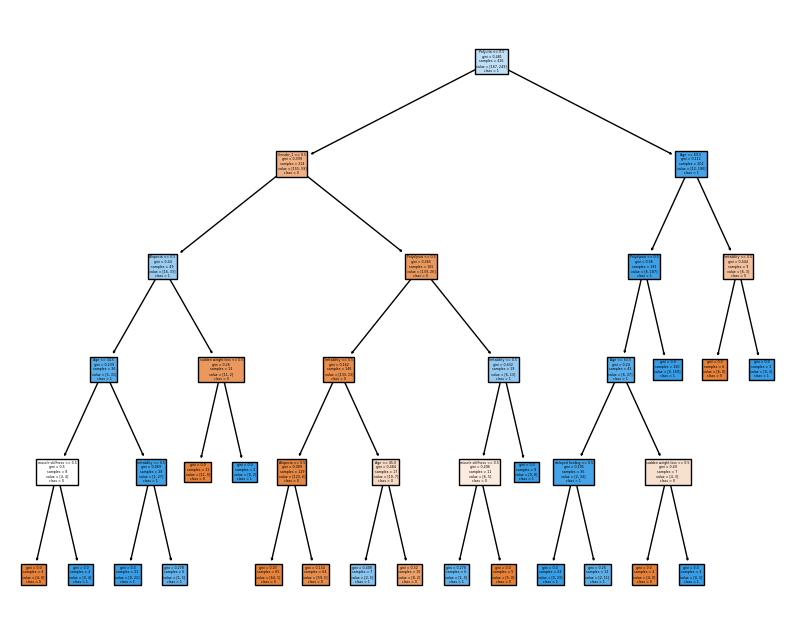

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()


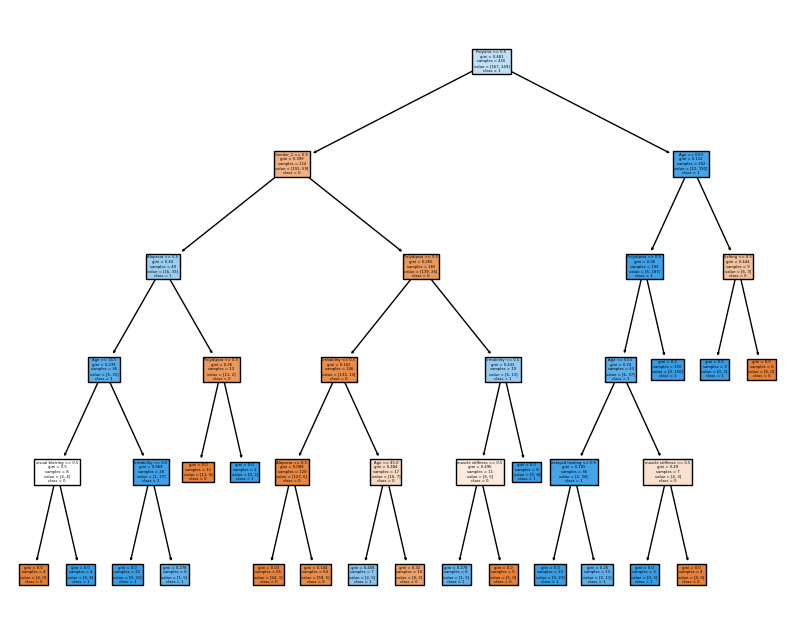

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True)

# Save the plot as a PNG image
plt.savefig("decision_tree.png")


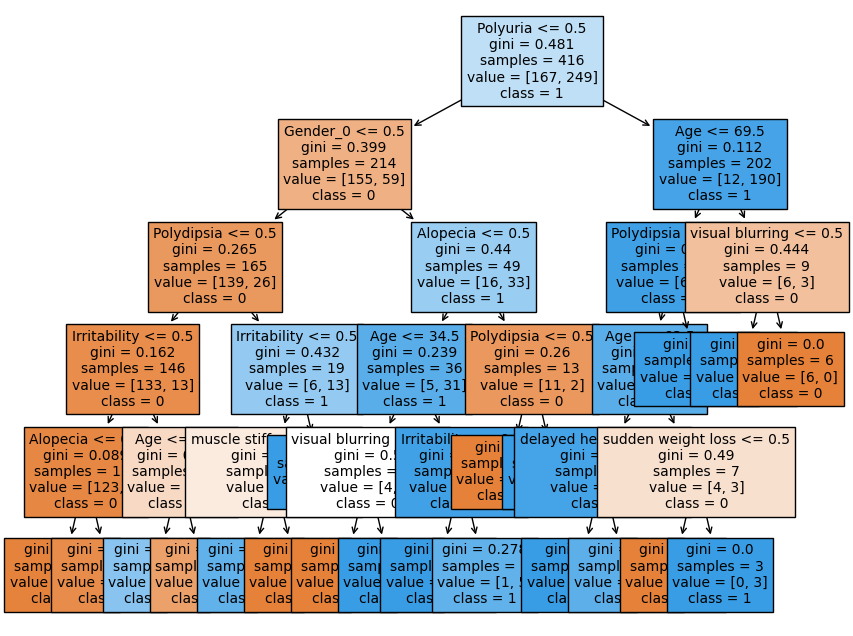

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree with increased text size
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=10)

# Save the plot as a PNG image
plt.savefig("decision_tree.png")


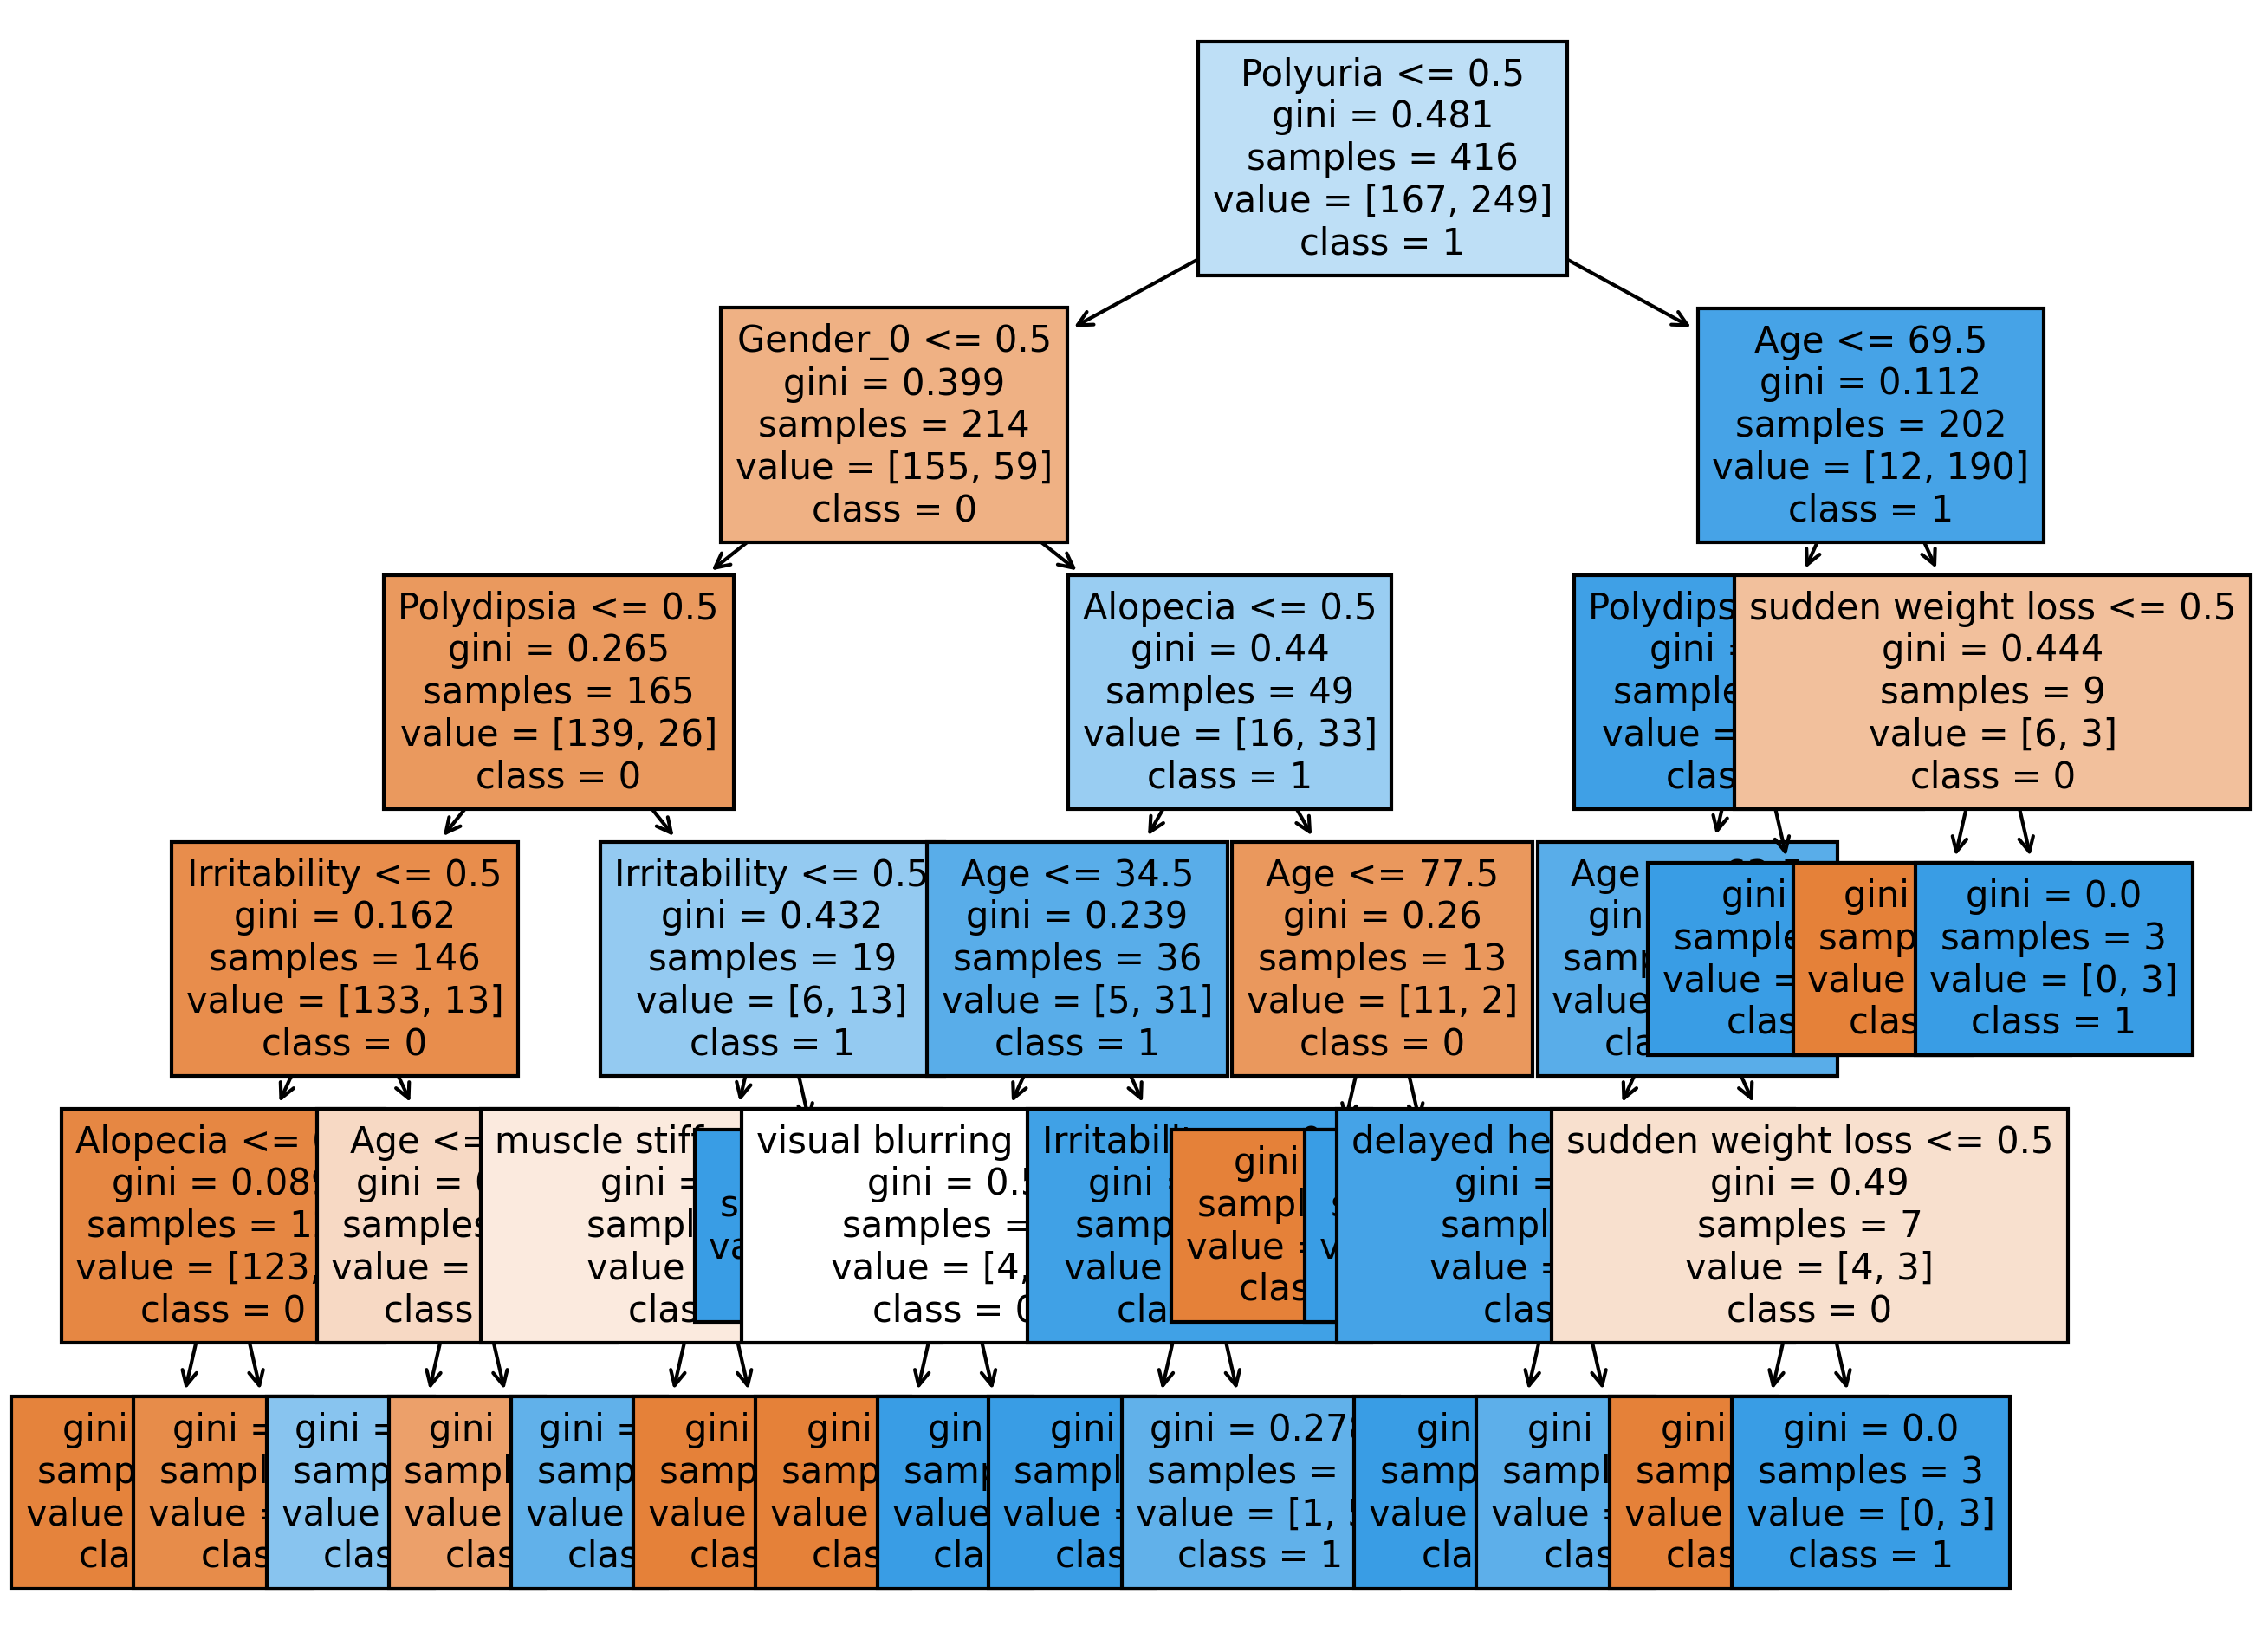

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree with increased text size
plt.figure(figsize=(10, 8), dpi=300)  # Set the dpi value as per your requirement
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=10)

# Save the plot as a high-resolution PNG image
plt.savefig("decision_tree_high_res.png", dpi=300)  # Specify the dpi value for high resolution


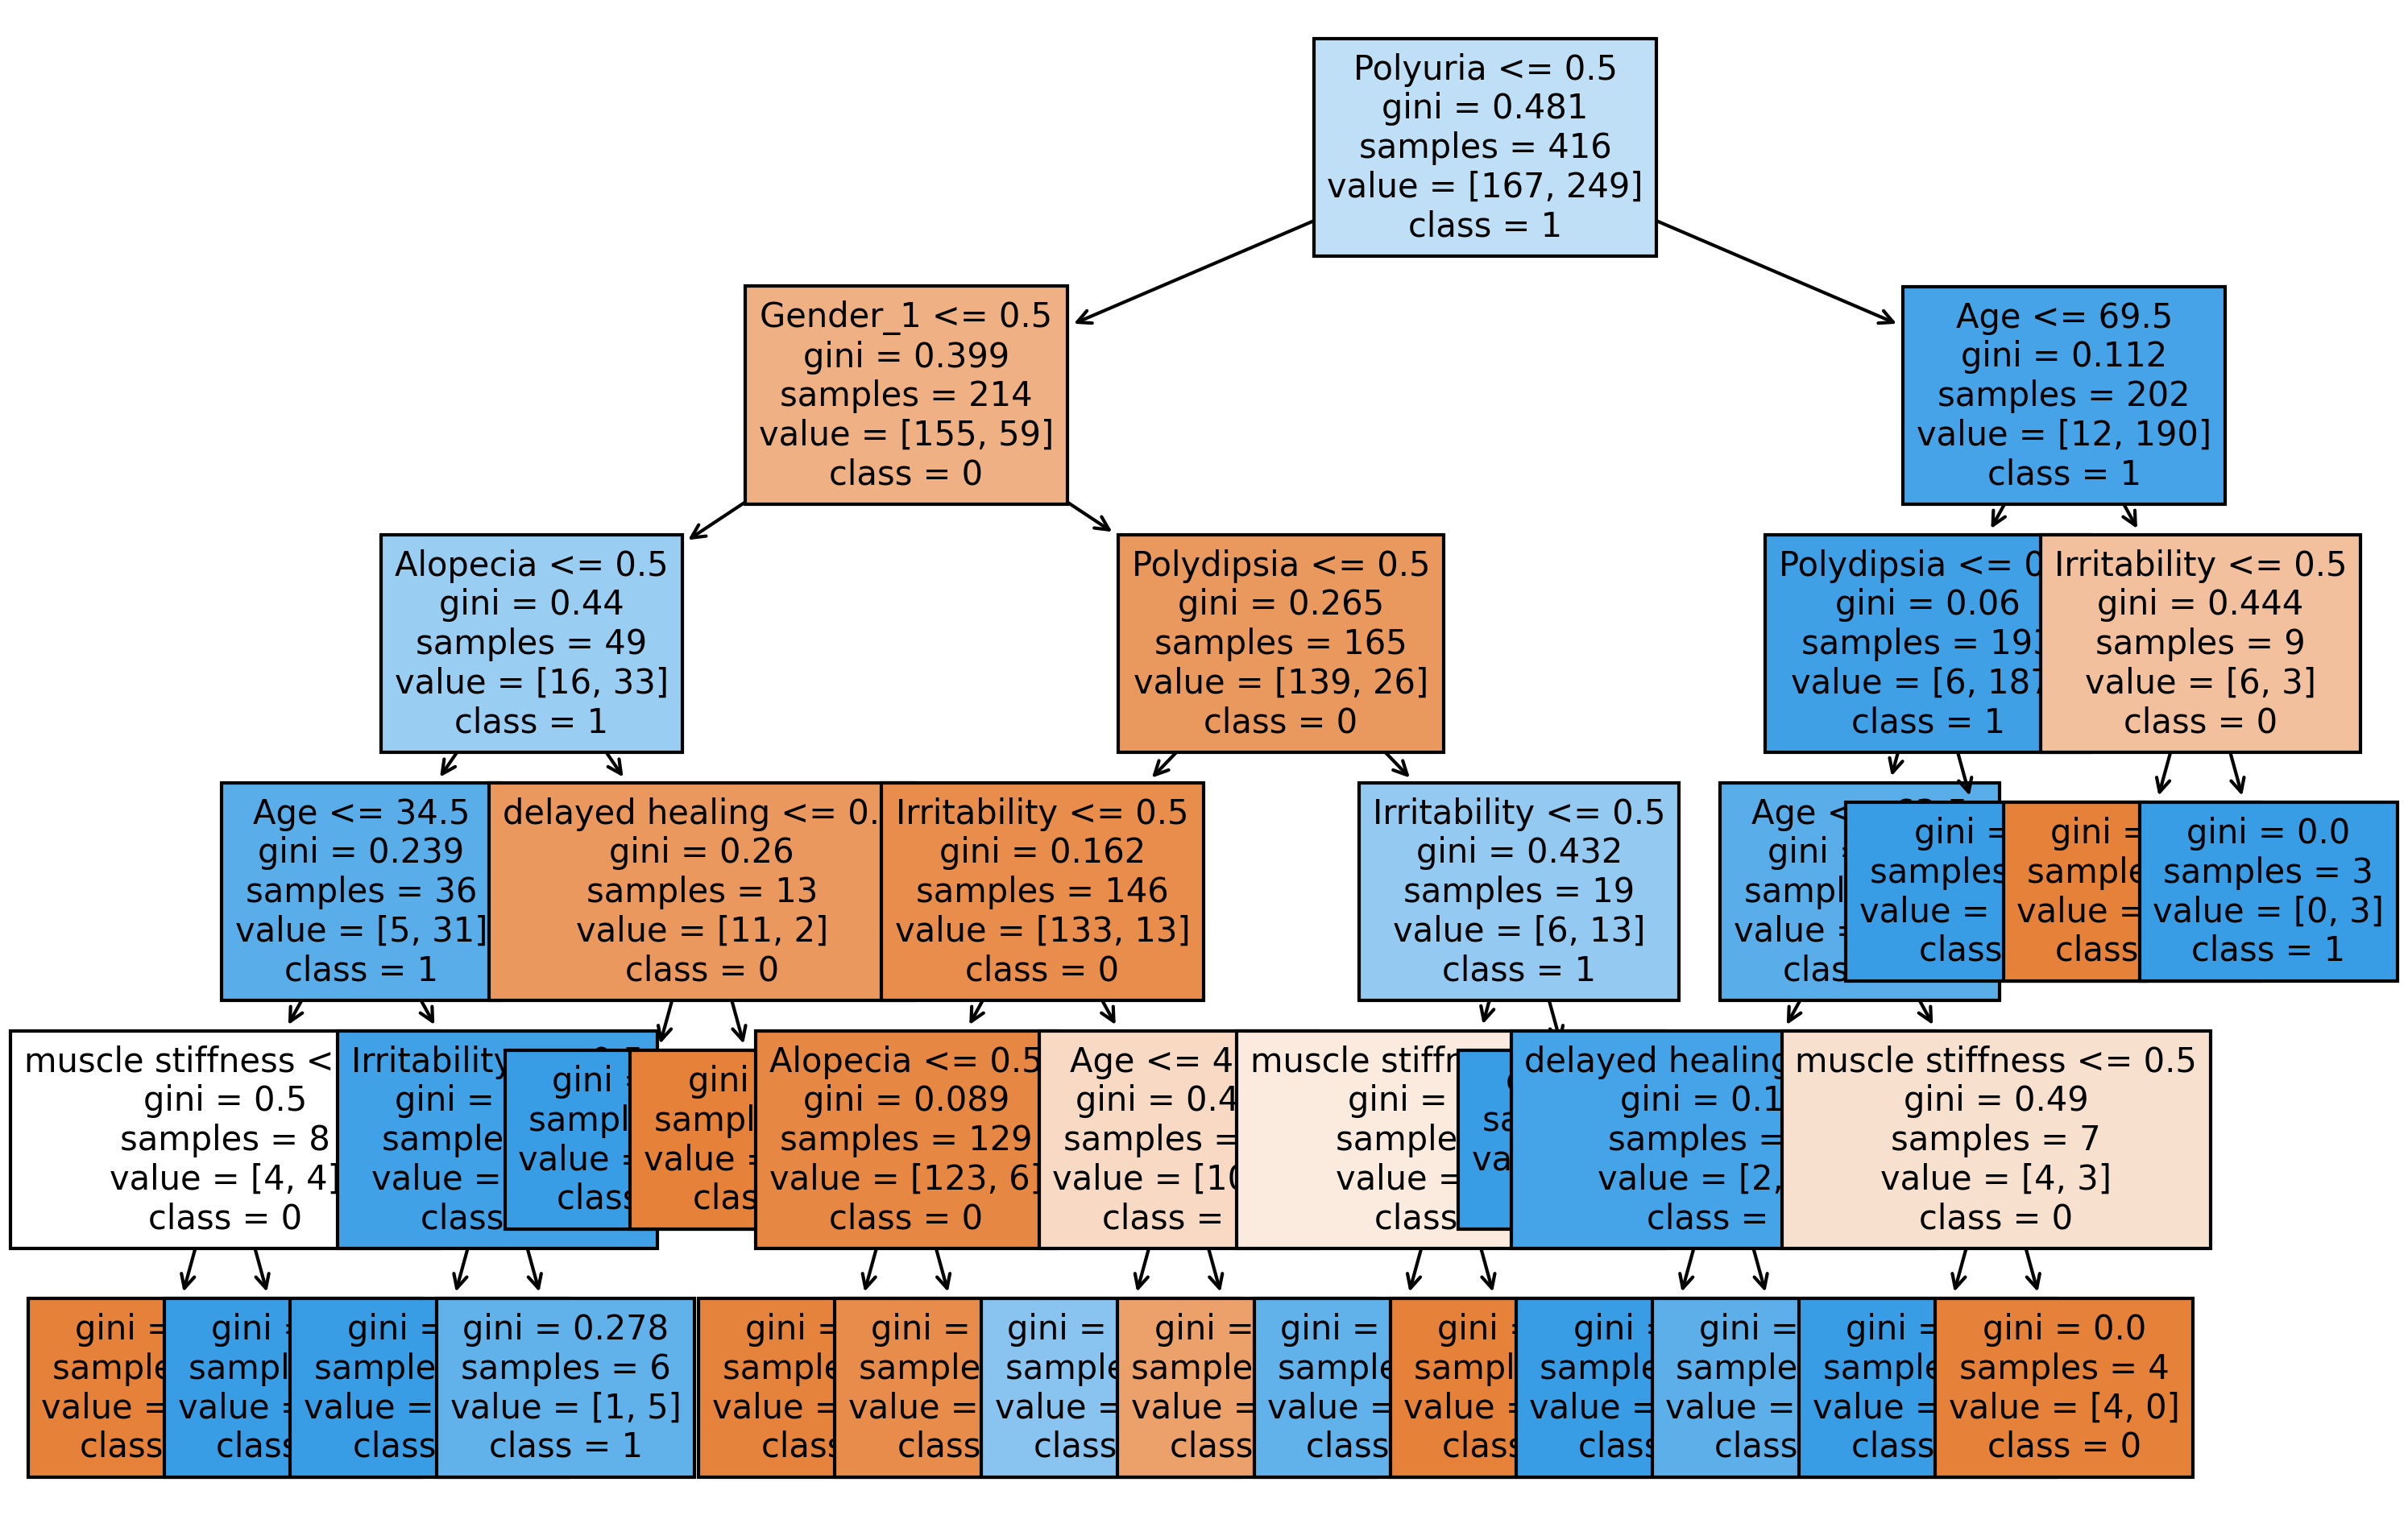

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree with increased text size and width
plt.figure(figsize=(12, 8), dpi=300)  # Increase the width by modifying the figsize parameter
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=10)

# Save the plot as a high-resolution PNG image
plt.savefig("decision_tree_high_res.png", dpi=300)

# Show the plot
plt.show()


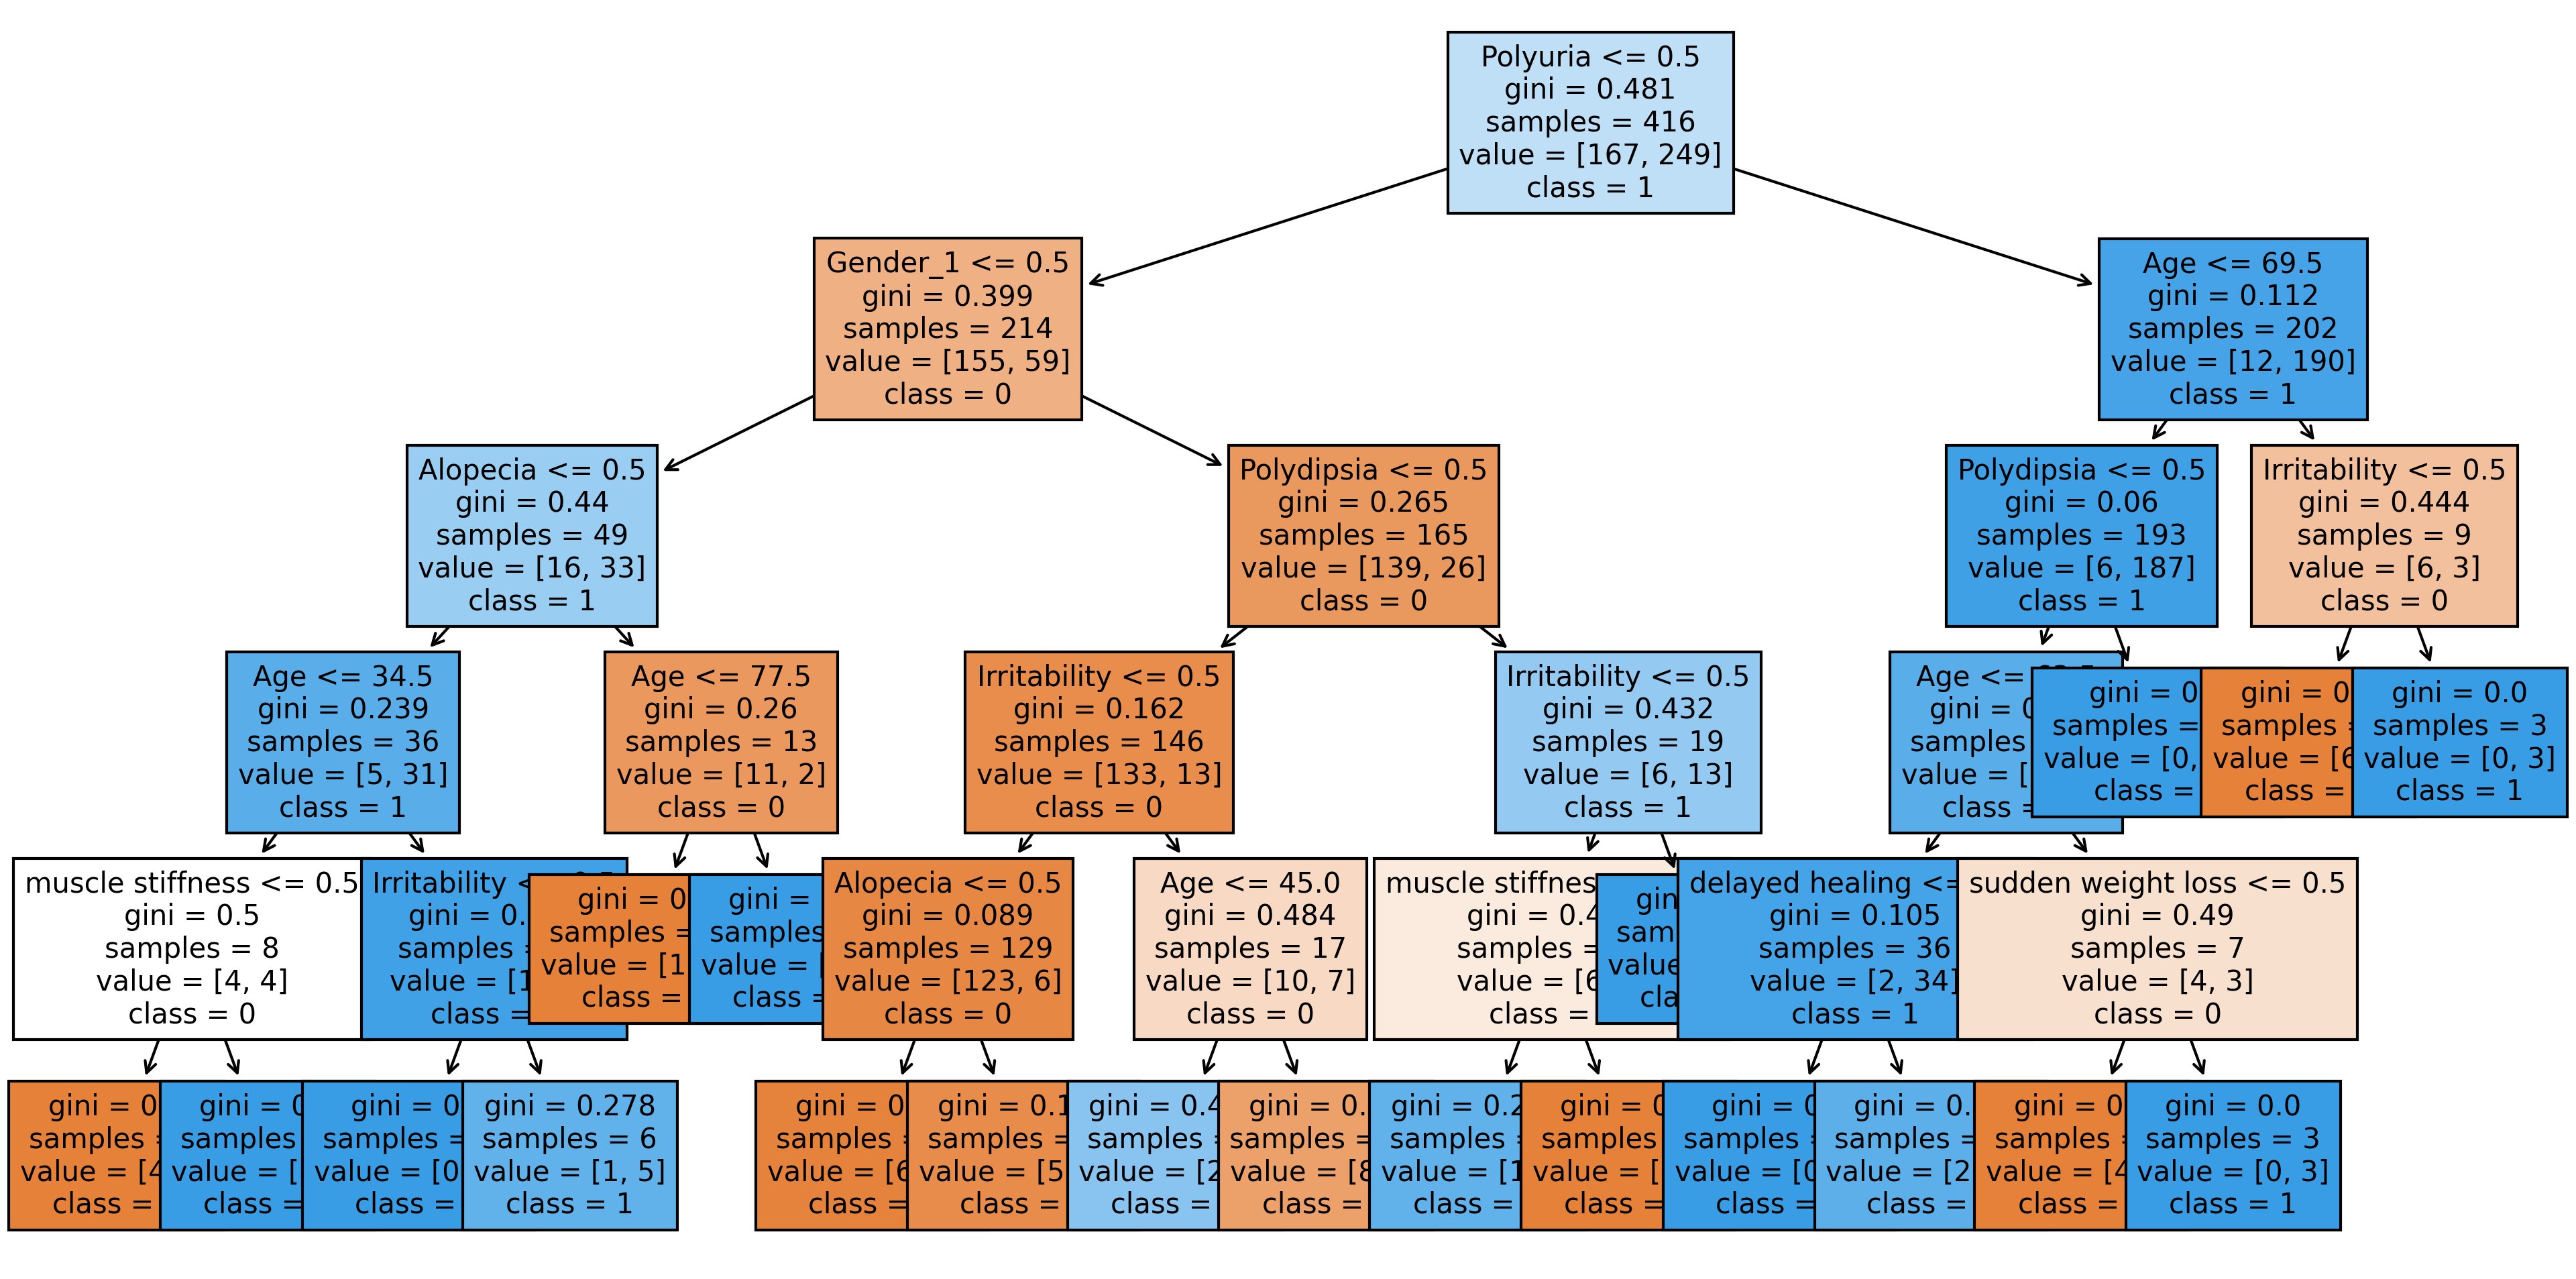

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree with increased text size and width
plt.figure(figsize=(16, 8), dpi=300)  # Increase the width by modifying the figsize parameter
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=10)

# Save the plot as a high-resolution PNG image
plt.savefig("decision_tree_high_res.png", dpi=300)

# Show the plot
plt.show()


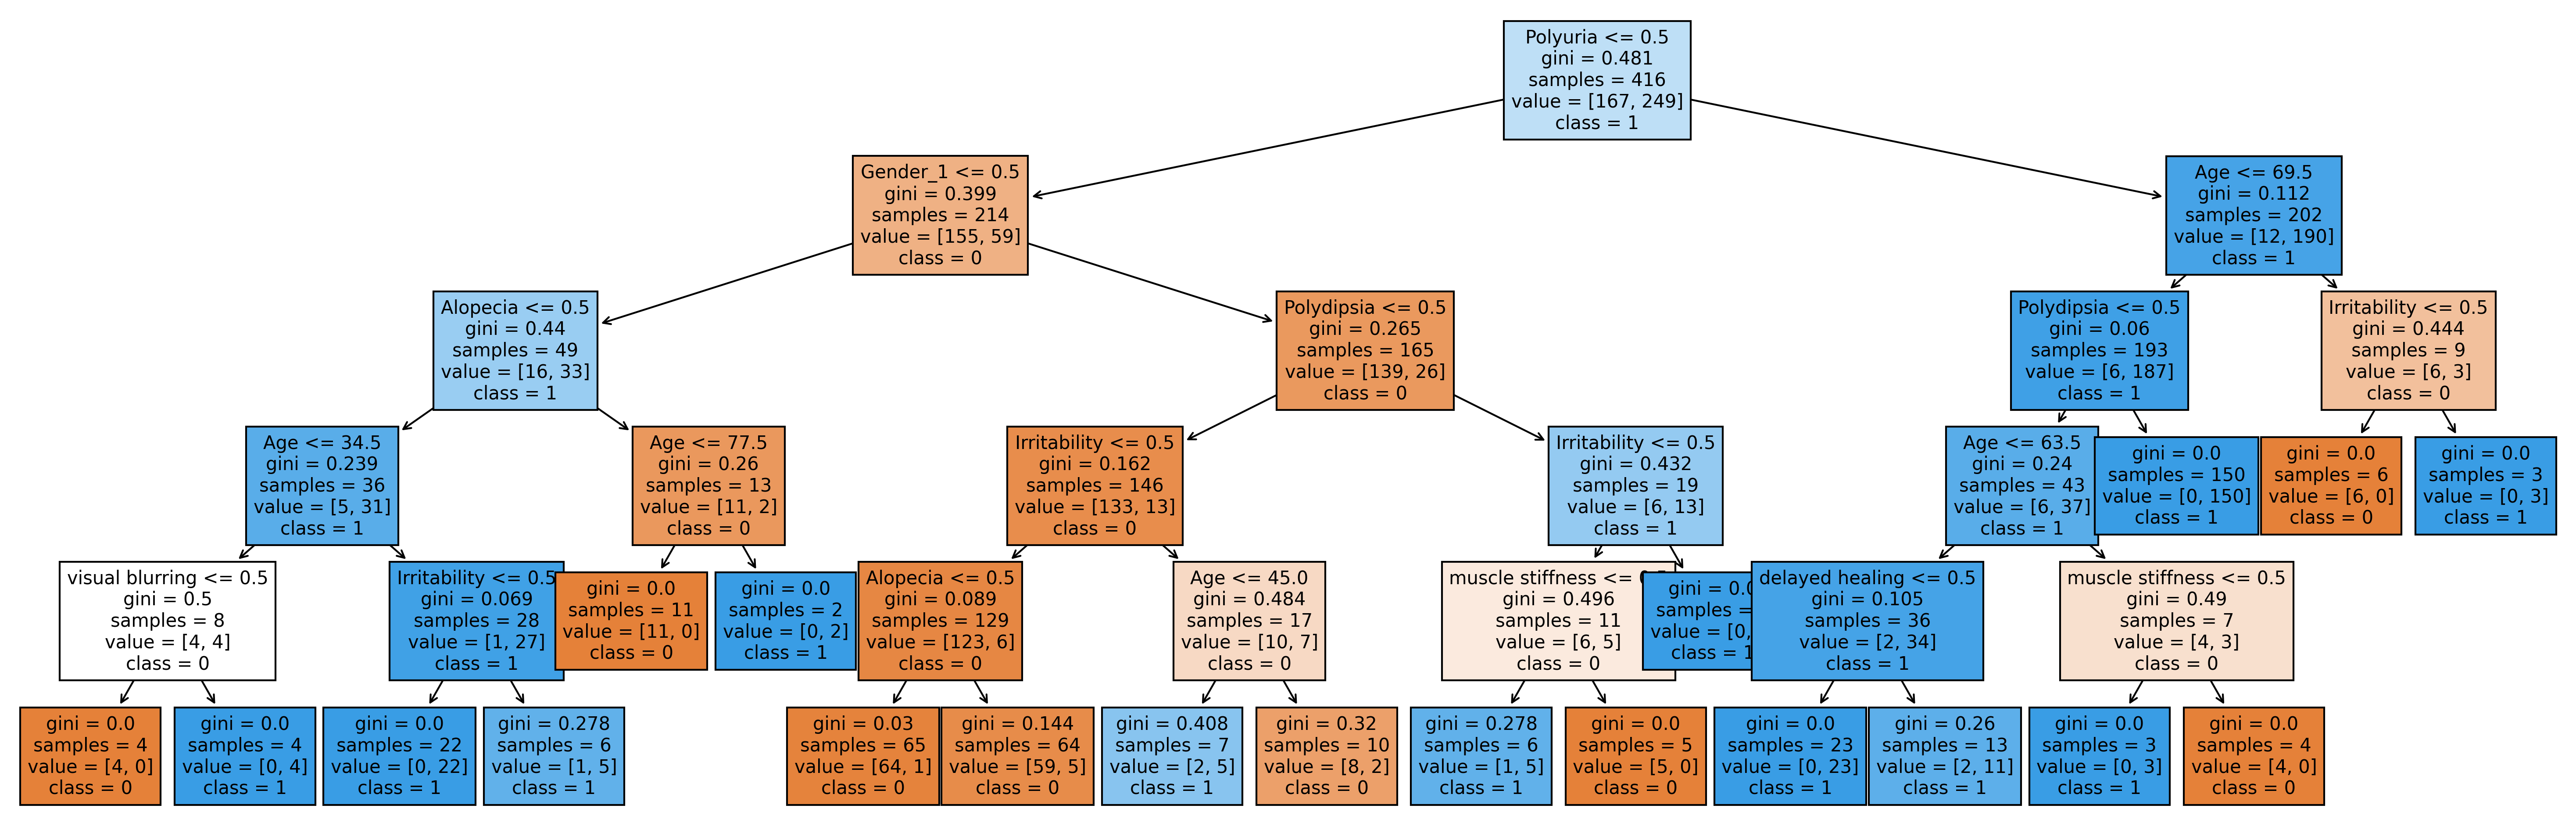

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Instantiate the Decision Tree classifier with a maximum depth of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Visualize the decision tree with increased text size and width
plt.figure(figsize=(25, 8), dpi=300)  # Increase the width by modifying the figsize parameter
plot_tree(decision_tree, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=10)

# Save the plot as a high-resolution PNG image
plt.savefig("decision_tree_high_res.png", dpi=300)

# Show the plot
plt.show()
